In [27]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import missingno as msno

In [2]:
from pandarallel import pandarallel

pandarallel.initialize(progress_bar=False, nb_workers=16)

INFO: Pandarallel will run on 16 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [3]:
def prepare_file_paths(year, category):
    file_names = os.listdir(os.path.join('dataset_nyc_taxi', category, year))
    file_paths = [os.path.join('dataset_nyc_taxi', category, year, file_name) for file_name in file_names]
    return file_paths

In [4]:
months_in_years = {
    '2019' : range(1, 12),
    '2020' : range(12),
    '2021' : range(12),
    '2022' : range(12),
    '2023' : range(12),
}

number_to_month = {
    0: 'January',
    1: 'February',
    2: 'March',
    3: 'April',
    4: 'May',
    5: 'June',
    6: 'July',
    7: 'August',
    8: 'September',
    9: 'October',
    10: 'November',
    11: 'December'
}

In [5]:
categories = ['fhv', 'green', 'yellow']
years = ['2019', '2020', '2021', '2022', '2023']

In [6]:
prepare_file_paths('2020', 'fhv')

['dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-01.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-02.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-03.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-04.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-05.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-06.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-07.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-08.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-09.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-10.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-11.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-12.parquet']

In [7]:
month_df = pd.read_parquet('dataset_nyc_taxi/fhv/2020/fhvhv_tripdata_2020-01.parquet')
month_df.head()

hvfhs_license_num dispatching_base_num originating_base_num  \
0            HV0003               B02864               B02864   
1            HV0003               B02682               B02682   
2            HV0003               B02764               B02764   
3            HV0003               B02764               B02764   
4            HV0003               B02764               B02764   

     request_datetime   on_scene_datetime     pickup_datetime  \
0 2020-01-01 00:40:13 2020-01-01 00:43:34 2020-01-01 00:45:34   
1 2020-01-01 00:42:31 2020-01-01 00:46:33 2020-01-01 00:47:50   
2 2020-01-01 00:01:42 2020-01-01 00:02:06 2020-01-01 00:04:37   
3 2020-01-01 00:21:23 2020-01-01 00:26:02 2020-01-01 00:26:36   
4 2020-01-01 00:32:20 2020-01-01 00:37:06 2020-01-01 00:37:49   

     dropoff_datetime  PULocationID  DOLocationID  trip_miles  ...  sales_tax  \
0 2020-01-01 01:02:20           148            90        1.93  ...       2.70   
1 2020-01-01 00:53:23           114            79        0.81  ...       1.31   
2 2020-01-01 00:21:49             4           125        2.53  ...       1.39   
3 2020-01-01 00:33:00           231           113        1.11  ...       0.75   
4 2020-01-01 00:46:59           114           144        1.10  ...       1.03   

   congestion_surcharge  airport_fee  tips  driver_pay  shared_request_flag  \
0                  2.75          NaN   0.0       18.25                    N   
1                  2.75          NaN   0.0       10.84                    N   
2                  2.75          NaN   3.0       11.73                    N   
3                  2.75          NaN   0.0        5.84                    N   
4                  2.75          NaN   0.0        7.69                    N   

   shared_match_flag  access_a_ride_flag  wav_request_flag wav_match_flag  
0                  N                                     N              N  
1                  N                                     N              N  
2                  N                                     N              N  
3                  N                                     N              N  
4                  N                                     N              N  

[5 rows x 24 columns]

In [8]:
month_df.describe()

PULocationID  DOLocationID    trip_miles     trip_time  \
count  2.056937e+07  2.056937e+07  2.056937e+07  2.056937e+07   
mean   1.393353e+02  1.418391e+02  4.556780e+00  1.040438e+03   
std    7.518385e+01  7.767920e+01  5.415823e+00  7.094020e+02   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
25%    7.500000e+01  7.500000e+01  1.483000e+00  5.470000e+02   
50%    1.400000e+02  1.420000e+02  2.710000e+00  8.600000e+02   
75%    2.110000e+02  2.180000e+02  5.478000e+00  1.334000e+03   
max    2.650000e+02  2.650000e+02  3.395500e+02  5.048900e+04   

       base_passenger_fare         tolls           bcf     sales_tax  \
count         2.056937e+07  2.056937e+07  2.056937e+07  2.056937e+07   
mean          1.701709e+01  8.423652e-01  4.402388e-01  1.405656e+00   
std           1.611271e+01  3.417818e+00  4.736847e-01  1.309837e+00   
min          -1.277800e+02  0.000000e+00  0.000000e+00  0.000000e+00   
25%           7.720000e+00  0.000000e+00  1.800000e-01  6.400000e-01   
50%           1.199000e+01  0.000000e+00  2.900000e-01  1.000000e+00   
75%           2.029000e+01  0.000000e+00  5.200000e-01  1.710000e+00   
max           1.461660e+03  1.187200e+02  3.707000e+01  7.202000e+01   

       congestion_surcharge  airport_fee          tips    driver_pay  
count          2.056937e+07         43.0  2.056937e+07  2.056937e+07  
mean           9.744287e-01          0.0  6.074975e-01  1.311404e+01  
std            1.261104e+00          0.0  2.186553e+00  1.281221e+01  
min            0.000000e+00          0.0  0.000000e+00 -1.517200e+02  
25%            0.000000e+00          0.0  0.000000e+00  5.600000e+00  
50%            0.000000e+00          0.0  0.000000e+00  9.610000e+00  
75%            2.750000e+00          0.0  0.000000e+00  1.656000e+01  
max            8.250000e+00          0.0  1.000000e+02  1.054270e+03

In [9]:
month_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20569368 entries, 0 to 20569367
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[ns]
 4   on_scene_datetime     datetime64[ns]
 5   pickup_datetime       datetime64[ns]
 6   dropoff_datetime      datetime64[ns]
 7   PULocationID          int64         
 8   DOLocationID          int64         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  airport_fee           float64       
 17  tips                  float64       
 18  driver_pay            float64       
 19

In [7]:
weather_df = pd.read_csv('dataset_nyc_taxi/open-meteo-nyc-2019-2023.csv')
weather_df['time'] = pd.to_datetime(weather_df['time'])
weather_df.head()

time  temperature_2m (°C)  relative_humidity_2m (%)  \
0 2019-02-01 00:00:00                -10.4                        30   
1 2019-02-01 01:00:00                -10.4                        30   
2 2019-02-01 02:00:00                -10.5                        29   
3 2019-02-01 03:00:00                -10.8                        30   
4 2019-02-01 04:00:00                -11.0                        31   

   dew_point_2m (°C)  apparent_temperature (°C)  precipitation (mm)  \
0              -24.6                      -16.1                 0.0   
1              -24.7                      -16.1                 0.0   
2              -25.1                      -16.3                 0.0   
3              -25.0                      -16.5                 0.0   
4              -24.7                      -17.0                 0.0   

   rain (mm)  snowfall (cm)  snow_depth (m)  surface_pressure (hPa)  \
0        0.0            0.0            0.01                  1023.6   
1        0.0            0.0            0.01                  1023.5   
2        0.0            0.0            0.01                  1023.9   
3        0.0            0.0            0.01                  1023.9   
4        0.0            0.0            0.01                  1024.3   

   cloud_cover (%)  wind_speed_10m (km/h)  is_day ()  
0                0                   12.1          0  
1                1                   12.2          0  
2                0                   12.6          0  
3                0                   12.2          0  
4                2                   13.5          0

In [8]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43080 entries, 0 to 43079
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   time                       43080 non-null  datetime64[ns]
 1   temperature_2m (°C)        43080 non-null  float64       
 2   relative_humidity_2m (%)   43080 non-null  int64         
 3   dew_point_2m (°C)          43080 non-null  float64       
 4   apparent_temperature (°C)  43080 non-null  float64       
 5   precipitation (mm)         43080 non-null  float64       
 6   rain (mm)                  43080 non-null  float64       
 7   snowfall (cm)              43080 non-null  float64       
 8   snow_depth (m)             43080 non-null  float64       
 9   surface_pressure (hPa)     43080 non-null  float64       
 10  cloud_cover (%)            43080 non-null  int64         
 11  wind_speed_10m (km/h)      43080 non-null  float64       
 12  is_d

In [9]:
oil_df = pd.read_csv('dataset_nyc_taxi/oil_prices.csv')
oil_df['date'] = pd.to_datetime(oil_df['date'])
oil_df

date  retail_price
0   2018-12-31         3.110
1   2019-01-07         3.069
2   2019-01-14         3.049
3   2019-01-21         3.037
4   2019-01-28         3.050
..         ...           ...
257 2023-12-04         4.139
258 2023-12-11         4.050
259 2023-12-18         3.969
260 2023-12-25         4.022
261 2024-01-01         4.002

[262 rows x 2 columns]

In [10]:
oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          262 non-null    datetime64[ns]
 1   retail_price  262 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.2 KB


In [11]:
samples_monthly = pd.read_csv('dataset_nyc_taxi/samples_num_monthly.csv')
samples_monthly

Unnamed: 0  2019 february  2019 march  2019 april  2019 may  2019 june  \
0        fhv       20159102    23864598    21734822  22329247   21001990   
1      green         615594      643063      567852    545452     506238   
2     yellow        7049370     7866620     7475949   7598445    6971560   

   2019 july  2019 august  2019 september  2019 october  ...  2023 march  \
0   20303312     20126113        20069321      21162290  ...    20413539   
1     470743       449695          449063        476386  ...       72044   
2    6310419      6073357         6567788       7213891  ...     3403766   

   2023 april  2023 may  2023 june  2023 july  2023 august  2023 september  \
0    19144903  19847676   19366619   19132131     18322150        19851123   
1       65392     69174      65550      61343        60649           65471   
2     3288250   3513649    3307234    2907108      2824209         2846722   

   2023 october  2023 november  2023 december  
0      20186330       19269250       20516297  
1         66177          64025          64215  
2       3522285        3339715        3376567  

[3 rows x 60 columns]

In [12]:
samples_monthly.columns

Index(['Unnamed: 0', '2019 february', '2019 march', '2019 april', '2019 may',
       '2019 june', '2019 july', '2019 august', '2019 september',
       '2019 october', '2019 november', '2019 december', '2020 january',
       '2020 february', '2020 march', '2020 april', '2020 may', '2020 june',
       '2020 july', '2020 august', '2020 september', '2020 october',
       '2020 november', '2020 december', '2021 january', '2021 february',
       '2021 march', '2021 april', '2021 may', '2021 june', '2021 july',
       '2021 august', '2021 september', '2021 october', '2021 november',
       '2021 december', '2022 january', '2022 february', '2022 march',
       '2022 april', '2022 may', '2022 june', '2022 july', '2022 august',
       '2022 september', '2022 october', '2022 november', '2022 december',
       '2023 january', '2023 february', '2023 march', '2023 april', '2023 may',
       '2023 june', '2023 july', '2023 august', '2023 september',
       '2023 october', '2023 november', '2023 decem

In [13]:
samples_monthly['type'] = samples_monthly['Unnamed: 0']
samples_monthly.drop(columns=['Unnamed: 0'], inplace=True)
samples_monthly

2019 february  2019 march  2019 april  2019 may  2019 june  2019 july  \
0       20159102    23864598    21734822  22329247   21001990   20303312   
1         615594      643063      567852    545452     506238     470743   
2        7049370     7866620     7475949   7598445    6971560    6310419   

   2019 august  2019 september  2019 october  2019 november  ...  2023 april  \
0     20126113        20069321      21162290       21635568  ...    19144903   
1       449695          449063        476386         449500  ...       65392   
2      6073357         6567788       7213891        6878111  ...     3288250   

   2023 may  2023 june  2023 july  2023 august  2023 september  2023 october  \
0  19847676   19366619   19132131     18322150        19851123      20186330   
1     69174      65550      61343        60649           65471         66177   
2   3513649    3307234    2907108      2824209         2846722       3522285   

   2023 november  2023 december    type  
0       19269250       20516297     fhv  
1          64025          64215   green  
2        3339715        3376567  yellow  

[3 rows x 60 columns]

In [14]:
samples_green = samples_monthly[samples_monthly['type'] == 'green']
samples_green

2019 february  2019 march  2019 april  2019 may  2019 june  2019 july  \
1         615594      643063      567852    545452     506238     470743   

   2019 august  2019 september  2019 october  2019 november  ...  2023 april  \
1       449695          449063        476386         449500  ...       65392   

   2023 may  2023 june  2023 july  2023 august  2023 september  2023 october  \
1     69174      65550      61343        60649           65471         66177   

   2023 november  2023 december   type  
1          64025          64215  green  

[1 rows x 60 columns]

In [15]:
total_green_samples = samples_green.sum(axis=1, numeric_only=True).values[0]
total_green_samples

10059273

In [16]:
samples_green.columns

Index(['2019 february', '2019 march', '2019 april', '2019 may', '2019 june',
       '2019 july', '2019 august', '2019 september', '2019 october',
       '2019 november', '2019 december', '2020 january', '2020 february',
       '2020 march', '2020 april', '2020 may', '2020 june', '2020 july',
       '2020 august', '2020 september', '2020 october', '2020 november',
       '2020 december', '2021 january', '2021 february', '2021 march',
       '2021 april', '2021 may', '2021 june', '2021 july', '2021 august',
       '2021 september', '2021 october', '2021 november', '2021 december',
       '2022 january', '2022 february', '2022 march', '2022 april', '2022 may',
       '2022 june', '2022 july', '2022 august', '2022 september',
       '2022 october', '2022 november', '2022 december', '2023 january',
       '2023 february', '2023 march', '2023 april', '2023 may', '2023 june',
       '2023 july', '2023 august', '2023 september', '2023 october',
       '2023 november', '2023 december', 'type'],

In [17]:
samples_green

2019 february  2019 march  2019 april  2019 may  2019 june  2019 july  \
1         615594      643063      567852    545452     506238     470743   

   2019 august  2019 september  2019 october  2019 november  ...  2023 april  \
1       449695          449063        476386         449500  ...       65392   

   2023 may  2023 june  2023 july  2023 august  2023 september  2023 october  \
1     69174      65550      61343        60649           65471         66177   

   2023 november  2023 december   type  
1          64025          64215  green  

[1 rows x 60 columns]

In [18]:
year = '2019'
samples_green.loc[0:, f'{year} {number_to_month[list(months_in_years[year])[0]].lower()}'].values[0]

615594

In [19]:
years = list(months_in_years.keys())

In [20]:
timestamp_names = {
    'green': 'lpep_pickup_datetime',
    'yellow': 'tpep_pickup_datetime',
    'fhv': 'pickup_datetime'
}

In [22]:
def get_sample_proportional_monthly(oil_df, weather_df, samples_monthly, years, N_samples, vec_type='green'):
    
    type_samples = samples_monthly[samples_monthly['type'] == vec_type]
    total_type_samples = type_samples.sum(axis=1, numeric_only=True).values[0]
    
    train_dfs = []
    valid_dfs = []
    test_dfs = []
    
    timestamp_name = timestamp_names[vec_type]

    for year in years:
        year = str(year)
        year_filepaths = prepare_file_paths(year, vec_type)

        for i, month in enumerate(months_in_years[year]):
            samples_in_month = type_samples.loc[0:, f'{year} {number_to_month[month].lower()}'].values[0]

            month_N_samples = int(N_samples/total_type_samples * samples_in_month)
            
            month_df = pd.read_parquet(year_filepaths[i])
            if vec_type == 'fhv':
                choosen_df = month_df.sample(month_N_samples, random_state=42).copy()
            else:
                choosen_df = month_df[month_df['payment_type'] == 1].sample(month_N_samples, random_state=42).copy()
                
            choosen_df['nearest_date'] = choosen_df[timestamp_name].parallel_apply(lambda x: oil_df.iloc[(oil_df['date']-x).abs().argsort()[:1]]['date'].values[0])
            merged_oil_df = pd.merge(choosen_df, oil_df, how='left', left_on='nearest_date', right_on='date')
            merged_oil_df = merged_oil_df.drop(columns = ['nearest_date', 'date'])

            merged_oil_df['nearest_date'] = merged_oil_df[timestamp_name].parallel_apply(lambda x: weather_df.iloc[(weather_df['time']-x).abs().argsort()[:1]]['time'].values[0])
            merged_oil_weather_df = pd.merge(merged_oil_df, weather_df, how='left', left_on='nearest_date', right_on='time')
            merged_oil_weather_df = merged_oil_weather_df.drop(columns = ['nearest_date', 'time'])
            
            df_train, df_valid_test = train_test_split(merged_oil_weather_df, test_size=0.5, random_state=42)
            df_valid, df_test = train_test_split(df_valid_test, test_size=0.5, random_state=42)
            
            train_dfs.append(df_train)
            valid_dfs.append(df_valid)
            test_dfs.append(df_test)
            
        sample_train_df = pd.concat(train_dfs, ignore_index=True)
        sample_valid_df = pd.concat(valid_dfs, ignore_index=True)
        sample_test_df = pd.concat(test_dfs, ignore_index=True)

    return sample_train_df, sample_valid_df, sample_test_df

In [34]:
N_samples = 2 * 10 ** 6

yellow_proportional_samples = get_sample_proportional_monthly(oil_df, weather_df, samples_monthly, years, N_samples, 'yellow')
yellow_proportional_samples[0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              1  2019-02-15 12:27:24   2019-02-15 12:31:48              1.0   
1              2  2019-02-22 17:52:12   2019-02-22 18:04:09              1.0   
2              1  2019-02-25 02:33:32   2019-02-25 02:47:11              1.0   
3              2  2019-02-03 19:43:24   2019-02-03 19:52:12              2.0   
4              2  2019-02-22 08:55:42   2019-02-22 08:58:11              1.0   
...          ...                  ...                   ...              ...   
999964         2  2023-12-29 11:20:52   2023-12-29 11:28:01              1.0   
999965         1  2023-12-17 00:03:34   2023-12-17 00:48:38              1.0   
999966         1  2023-12-08 20:45:18   2023-12-08 21:11:40              0.0   
999967         2  2023-12-08 20:41:22   2023-12-08 20:55:09              1.0   
999968         2  2023-12-21 16:53:36   2023-12-21 17:15:00              4.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                0.50         1.0                  N           229   
1                1.25         1.0                  N           142   
2                3.60         1.0                  N           186   
3                1.68         1.0                  N           141   
4                0.48         1.0                  N           236   
...               ...         ...                ...           ...   
999964           0.61         1.0                  N           237   
999965           6.20         1.0                  N           234   
999966           4.90         1.0                  N           114   
999967           1.41         1.0                  N           237   
999968           2.14         1.0                  N           234   

        DOLocationID  payment_type  ...  apparent_temperature (°C)  \
0                237             1  ...                        7.1   
1                230             1  ...                        1.2   
2                236             1  ...                       -4.8   
3                161             1  ...                       -2.9   
4                236             1  ...                       -2.0   
...              ...           ...  ...                        ...   
999964           236             1  ...                        8.5   
999965            17             1  ...                        2.3   
999966           263             1  ...                        1.4   
999967           229             1  ...                        1.4   
999968           170             1  ...                       -3.2   

        precipitation (mm)  rain (mm)  snowfall (cm)  snow_depth (m)  \
0                      0.0        0.0            0.0            0.01   
1                      0.0        0.0            0.0            0.02   
2                      0.0        0.0            0.0            0.00   
3                      0.0        0.0            0.0            0.00   
4                      0.0        0.0            0.0            0.03   
...                    ...        ...            ...             ...   
999964                 0.0        0.0            0.0            0.00   
999965                 0.0        0.0            0.0            0.00   
999966                 0.0        0.0            0.0            0.00   
999967                 0.0        0.0            0.0            0.00   
999968                 0.0        0.0            0.0            0.00   

        surface_pressure (hPa)  cloud_cover (%)  wind_speed_10m (km/h)  \
0                       1001.1               56                   19.5   
1                       1022.4               30                   10.2   
2                        994.8              100                   33.3   
3                       1013.2               10                    8.6   
4                       1020.4               30                   11.4   
...                        ...              ...         

In [35]:
yellow_proportional_samples[1]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              1  2019-02-07 08:01:02   2019-02-07 08:10:58              1.0   
1              2  2019-02-04 10:34:39   2019-02-04 10:55:25              1.0   
2              2  2019-02-27 14:42:18   2019-02-27 14:50:53              1.0   
3              1  2019-02-26 14:18:48   2019-02-26 14:37:56              2.0   
4              4  2019-02-06 06:12:30   2019-02-06 06:15:23              1.0   
...          ...                  ...                   ...              ...   
499977         2  2023-12-15 00:35:34   2023-12-15 00:44:20              1.0   
499978         1  2023-12-22 07:49:32   2023-12-22 07:55:02              1.0   
499979         2  2023-12-28 16:48:22   2023-12-28 16:54:44              1.0   
499980         2  2023-12-08 01:10:20   2023-12-08 01:25:52              1.0   
499981         2  2023-12-28 11:49:18   2023-12-28 12:19:56              3.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                1.60         1.0                  N           236   
1                1.83         1.0                  N            90   
2                1.08         1.0                  N           236   
3                2.20         1.0                  N           236   
4                0.82         1.0                  N           100   
...               ...         ...                ...           ...   
499977           1.64         1.0                  N           239   
499978           2.40         1.0                  N           262   
499979           1.19         1.0                  N           140   
499980           4.54         1.0                  N           211   
499981          16.47         3.0                  N            48   

        DOLocationID  payment_type  ...  apparent_temperature (°C)  \
0                162             1  ...                       -1.4   
1                161             1  ...                        4.2   
2                262             1  ...                       -7.4   
3                239             1  ...                       -4.6   
4                 48             1  ...                       -5.4   
...              ...           ...  ...                        ...   
499977           151             1  ...                       -5.4   
499978           233             1  ...                      -10.4   
499979           262             1  ...                        9.6   
499980            61             1  ...                       -5.8   
499981             1             1  ...                        7.4   

        precipitation (mm)  rain (mm)  snowfall (cm)  snow_depth (m)  \
0                      0.0        0.0            0.0             0.0   
1                      0.0        0.0            0.0             0.0   
2                      0.0        0.0            0.0             0.0   
3                      0.0        0.0            0.0             0.0   
4                      0.0        0.0            0.0             0.0   
...                    ...        ...            ...             ...   
499977                 0.0        0.0            0.0             0.0   
499978                 0.0        0.0            0.0             0.0   
499979                 0.7        0.7            0.0             0.0   
499980                 0.0        0.0            0.0             0.0   
499981                 0.1        0.1            0.0             0.0   

        surface_pressure (hPa)  cloud_cover (%)  wind_speed_10m (km/h)  \
0                       1011.4              100                   11.9   
1                       1013.3                0                    5.6   
2                       1018.7               84                   15.5   
3                       1019.5                0                   28.0   
4                       1016.6               30                   10.9   
...                        ...              ...         

In [36]:
yellow_proportional_samples[2]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2019-02-11 21:00:48   2019-02-11 21:37:26              1.0   
1              2  2019-02-07 23:40:32   2019-02-07 23:53:23              1.0   
2              2  2019-02-25 07:28:39   2019-02-25 07:32:51              1.0   
3              2  2019-02-11 12:54:48   2019-02-11 13:06:20              5.0   
4              2  2019-02-19 16:40:55   2019-02-19 16:44:32              1.0   
...          ...                  ...                   ...              ...   
500013         1  2023-12-10 14:59:26   2023-12-10 15:29:09              1.0   
500014         2  2023-12-30 10:58:31   2023-12-30 11:12:13              1.0   
500015         1  2023-12-13 08:49:24   2023-12-13 08:55:49              1.0   
500016         2  2023-12-01 16:18:15   2023-12-01 16:44:05              1.0   
500017         2  2023-12-04 23:58:34   2023-12-05 00:16:07              3.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0               17.98         2.0                  N           132   
1                2.38         1.0                  N           186   
2                0.72         1.0                  N           161   
3                2.30         1.0                  N           239   
4                0.53         1.0                  N           236   
...               ...         ...                ...           ...   
500013           1.50         1.0                  N            68   
500014           2.29         1.0                  N           152   
500015           0.50         1.0                  N           236   
500016           3.97         1.0                  N           186   
500017           2.58         1.0                  N           107   

        DOLocationID  payment_type  ...  apparent_temperature (°C)  \
0                186             1  ...                       -3.5   
1                239             1  ...                        1.5   
2                161             1  ...                       -8.6   
3                236             1  ...                       -3.1   
4                262             1  ...                       -3.3   
...              ...           ...  ...                        ...   
500013           161             1  ...                       14.2   
500014            74             1  ...                       -0.0   
500015           237             1  ...                       -2.9   
500016           239             1  ...                        5.2   
500017           230             1  ...                       -0.3   

        precipitation (mm)  rain (mm)  snowfall (cm)  snow_depth (m)  \
0                      0.0        0.0            0.0            0.00   
1                      0.0        0.0            0.0            0.00   
2                      0.0        0.0            0.0            0.00   
3                      0.0        0.0            0.0            0.01   
4                      0.0        0.0            0.0            0.01   
...                    ...        ...            ...             ...   
500013                 1.1        1.1            0.0            0.00   
500014                 0.0        0.0            0.0            0.00   
500015                 0.0        0.0            0.0            0.00   
500016                 0.0        0.0            0.0            0.00   
500017                 0.0        0.0            0.0            0.00   

        surface_pressure (hPa)  cloud_cover (%)  wind_speed_10m (km/h)  \
0                       1021.4               90                    4.7   
1                       1010.5              100                   10.2   
2                        997.9                0                   35.4   
3                       1019.7               90                   11.0   
4                       1027.5               22                   14.3   
...                        ...              ...         

<Axes: >

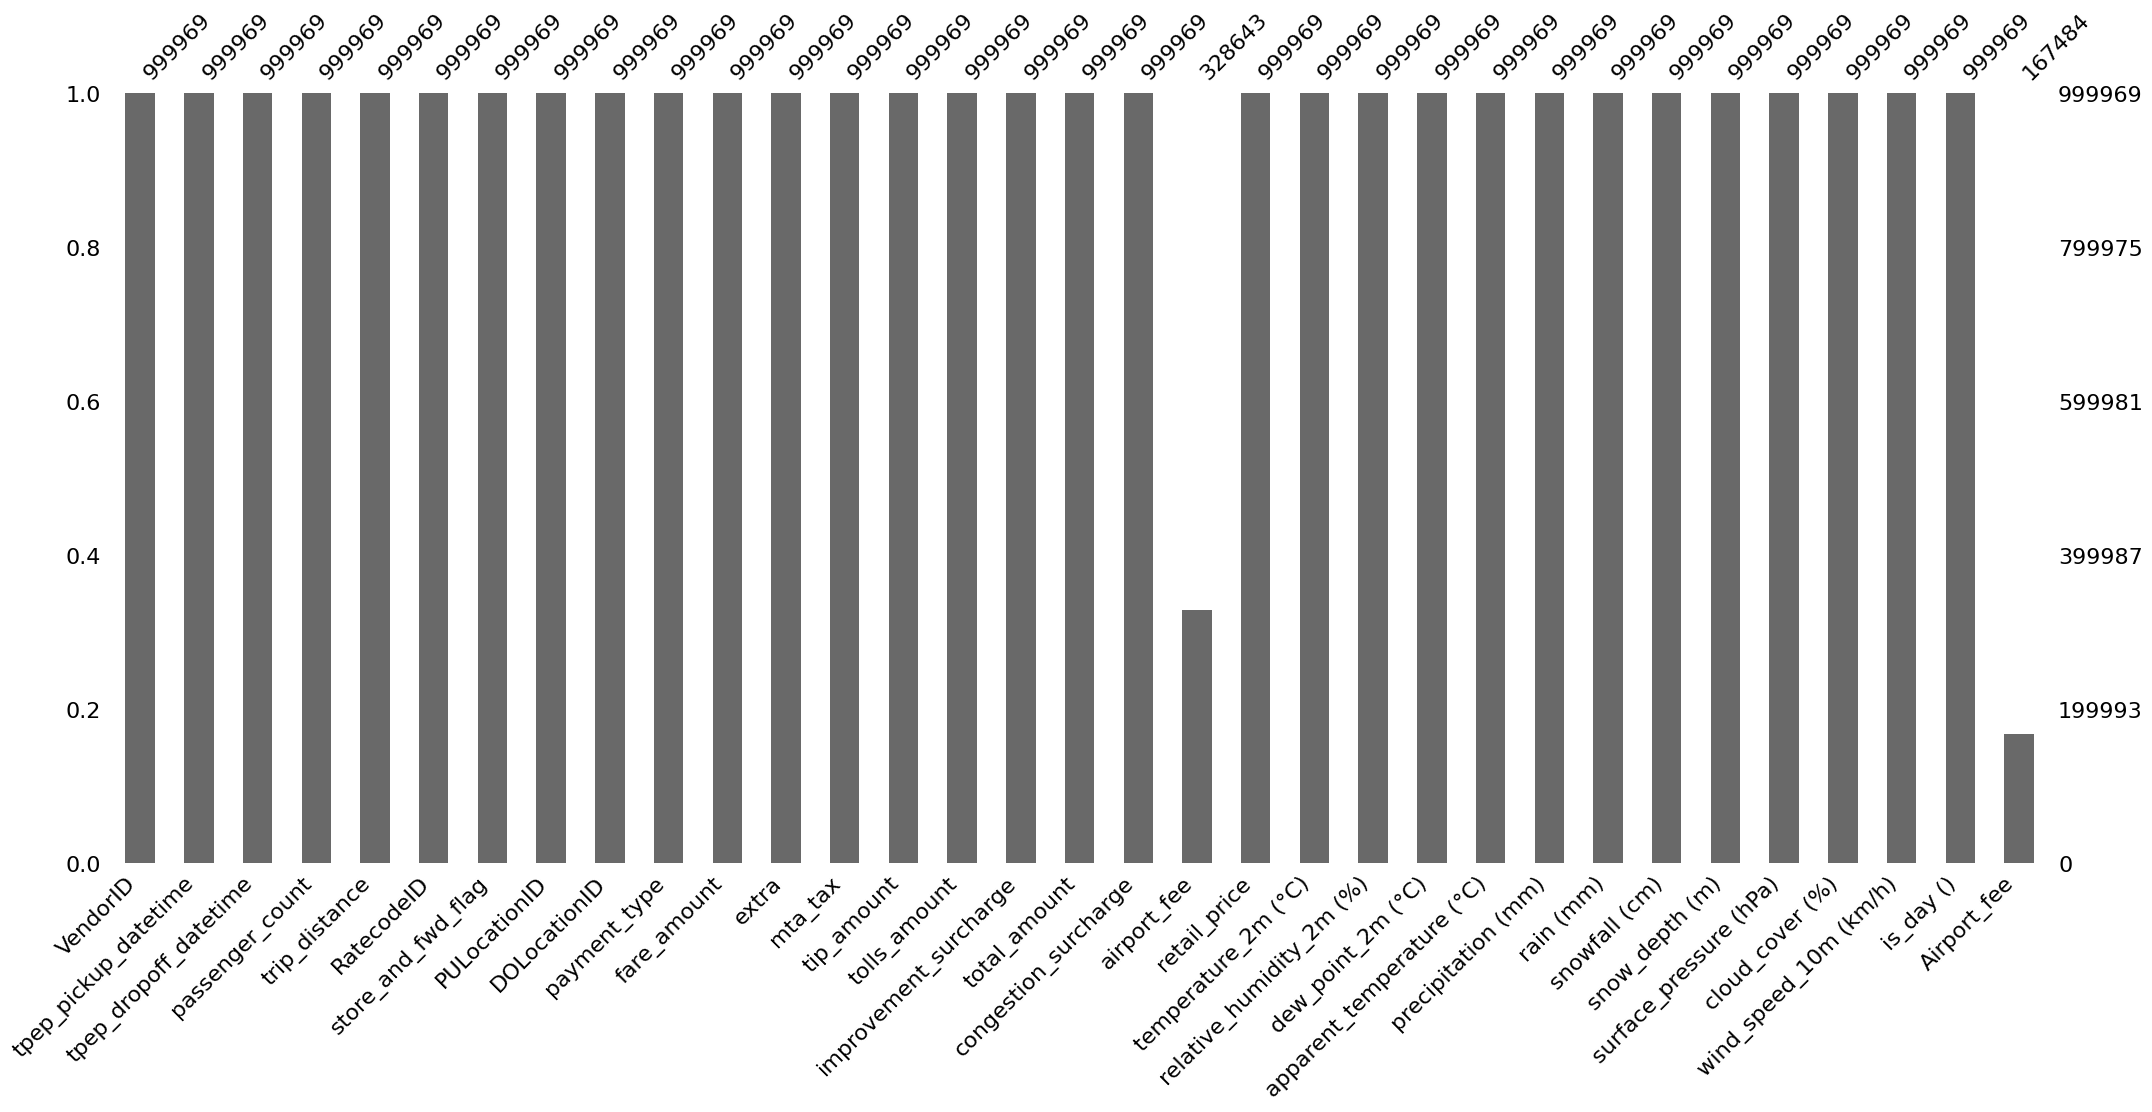

In [37]:
import missingno as msno

msno.bar(yellow_proportional_samples[0])

In [38]:
yellow_proportional_samples[0]['airport_fee'].fillna(yellow_proportional_samples[0]['Airport_fee'], inplace=True)

<Axes: >

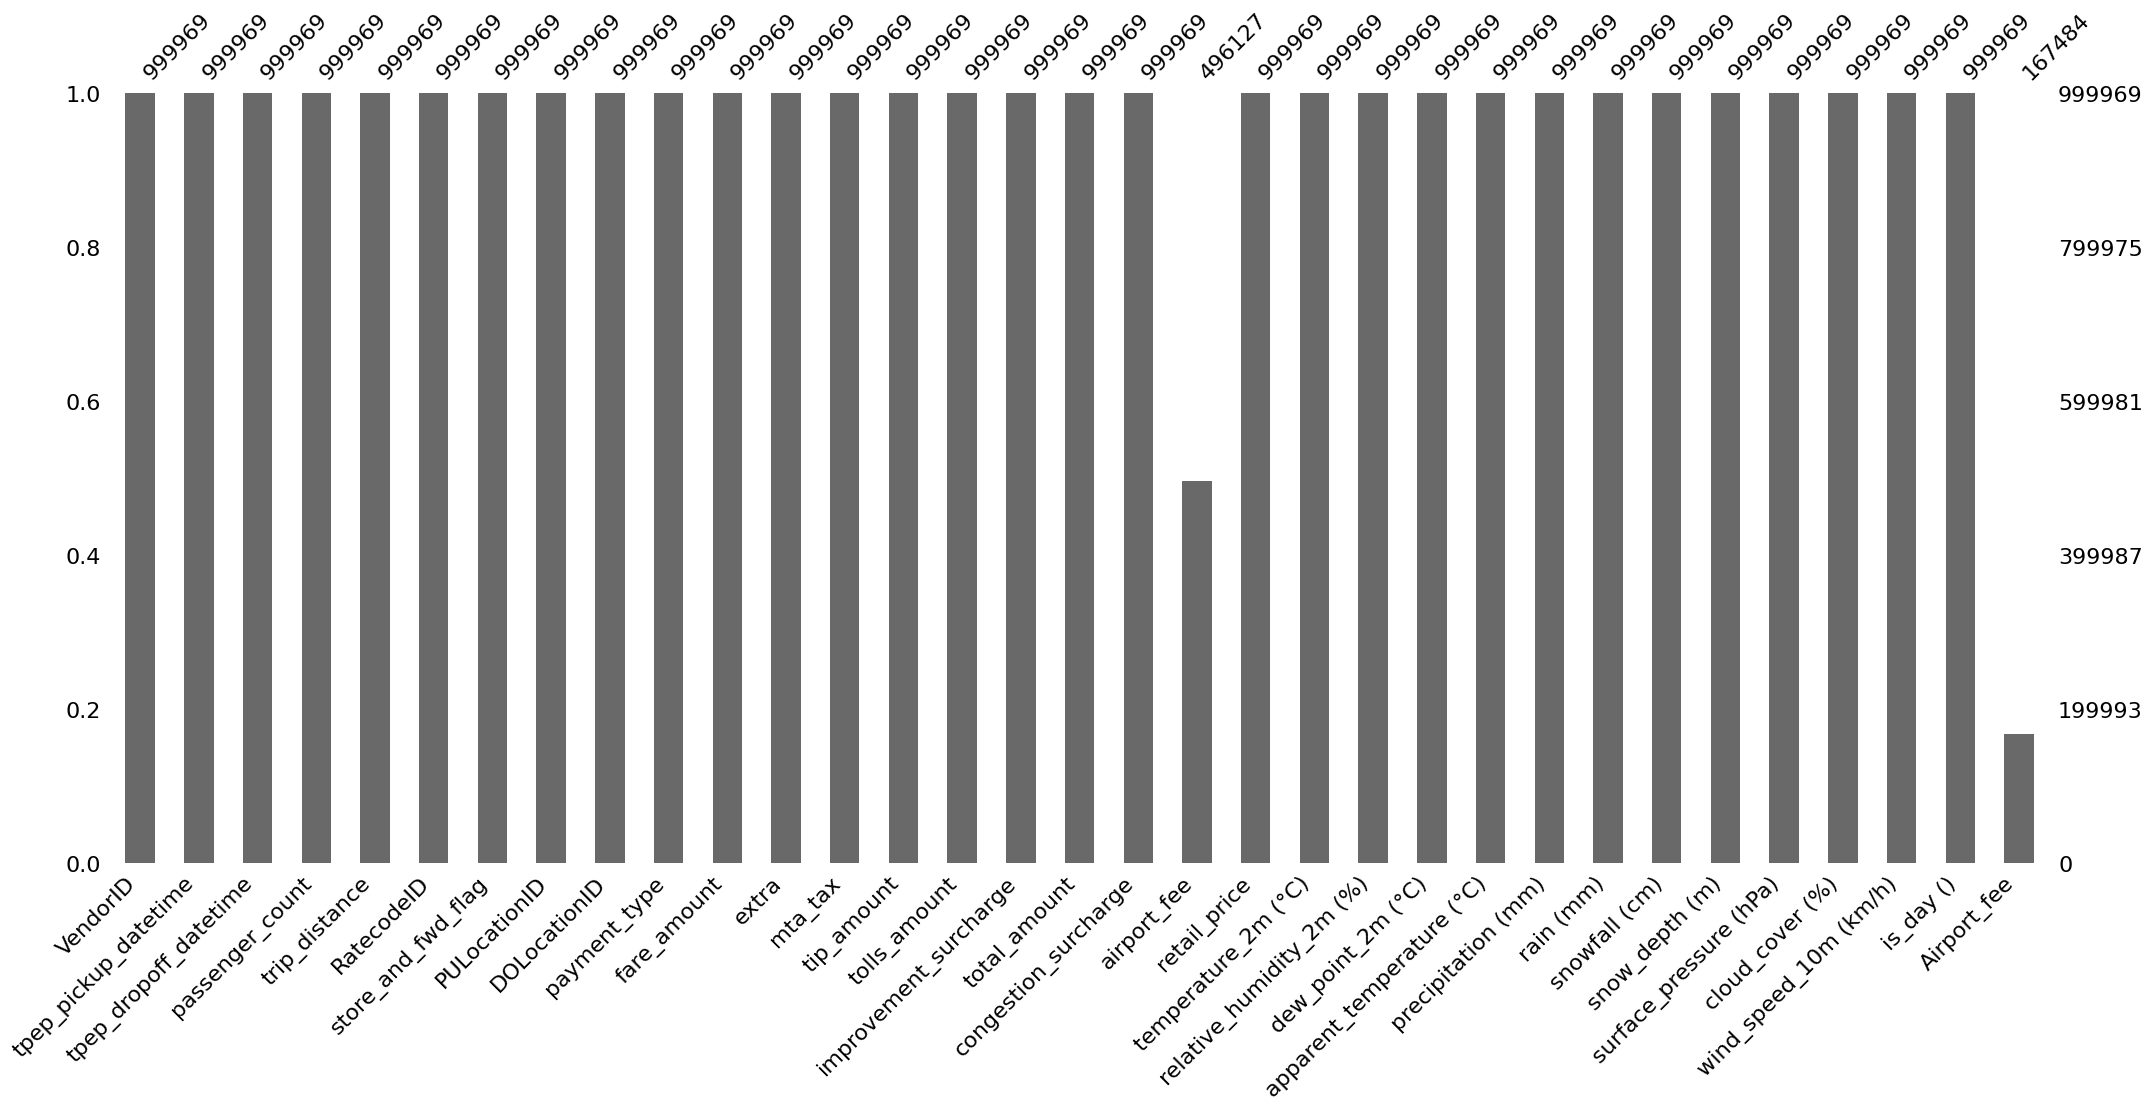

In [39]:
msno.bar(yellow_proportional_samples[0])

<Axes: >

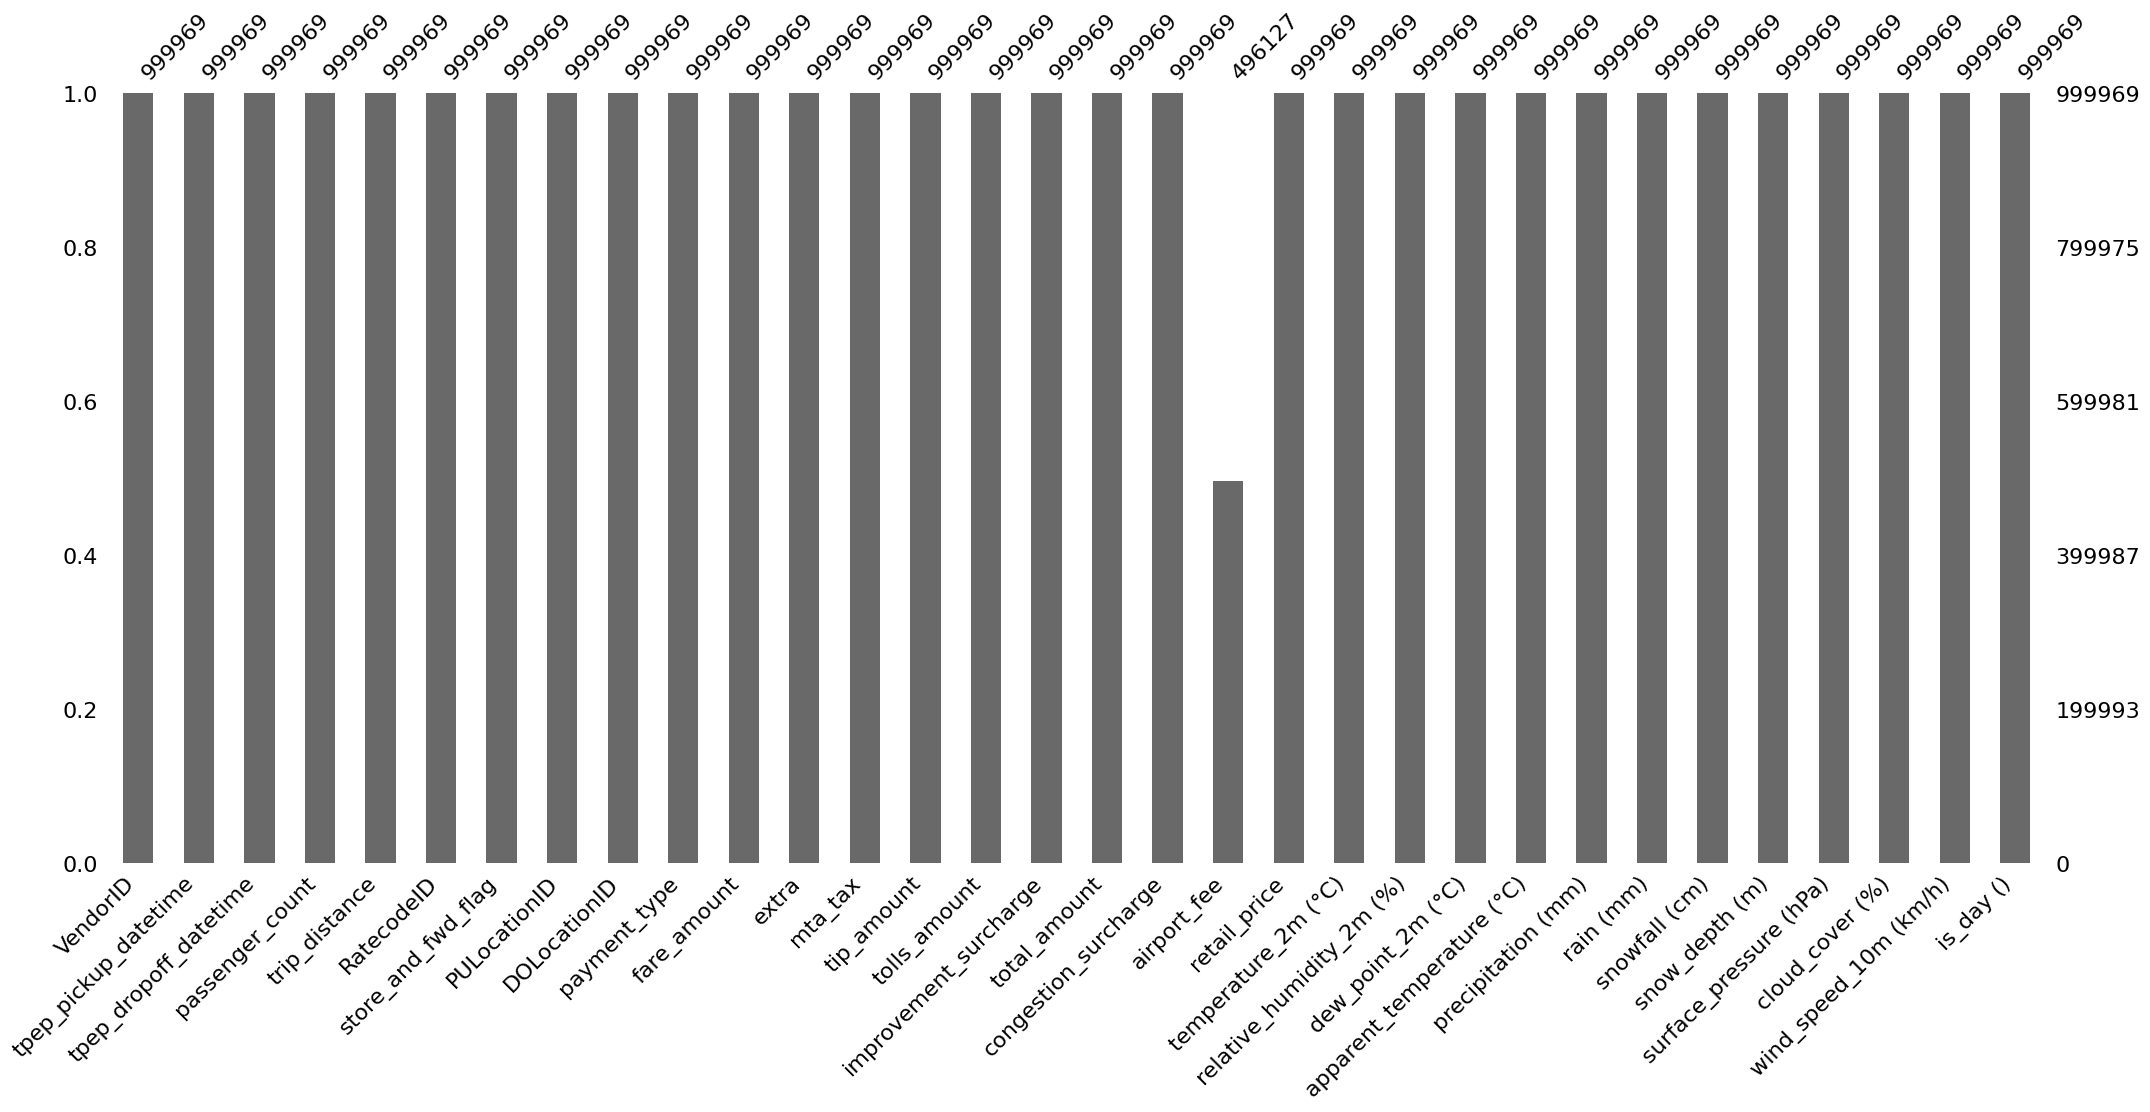

In [40]:
yellow_proportional_samples[0]['airport_fee'].fillna(yellow_proportional_samples[0]['Airport_fee'], inplace=True)
yellow_proportional_samples[0].drop(columns = 'Airport_fee', inplace=True)
msno.bar(yellow_proportional_samples[0])

In [41]:
for i in [1, 2]:
    yellow_proportional_samples[i]['airport_fee'].fillna(yellow_proportional_samples[i]['Airport_fee'], inplace=True)
    yellow_proportional_samples[i].drop(columns = 'Airport_fee', inplace=True)

<Axes: >

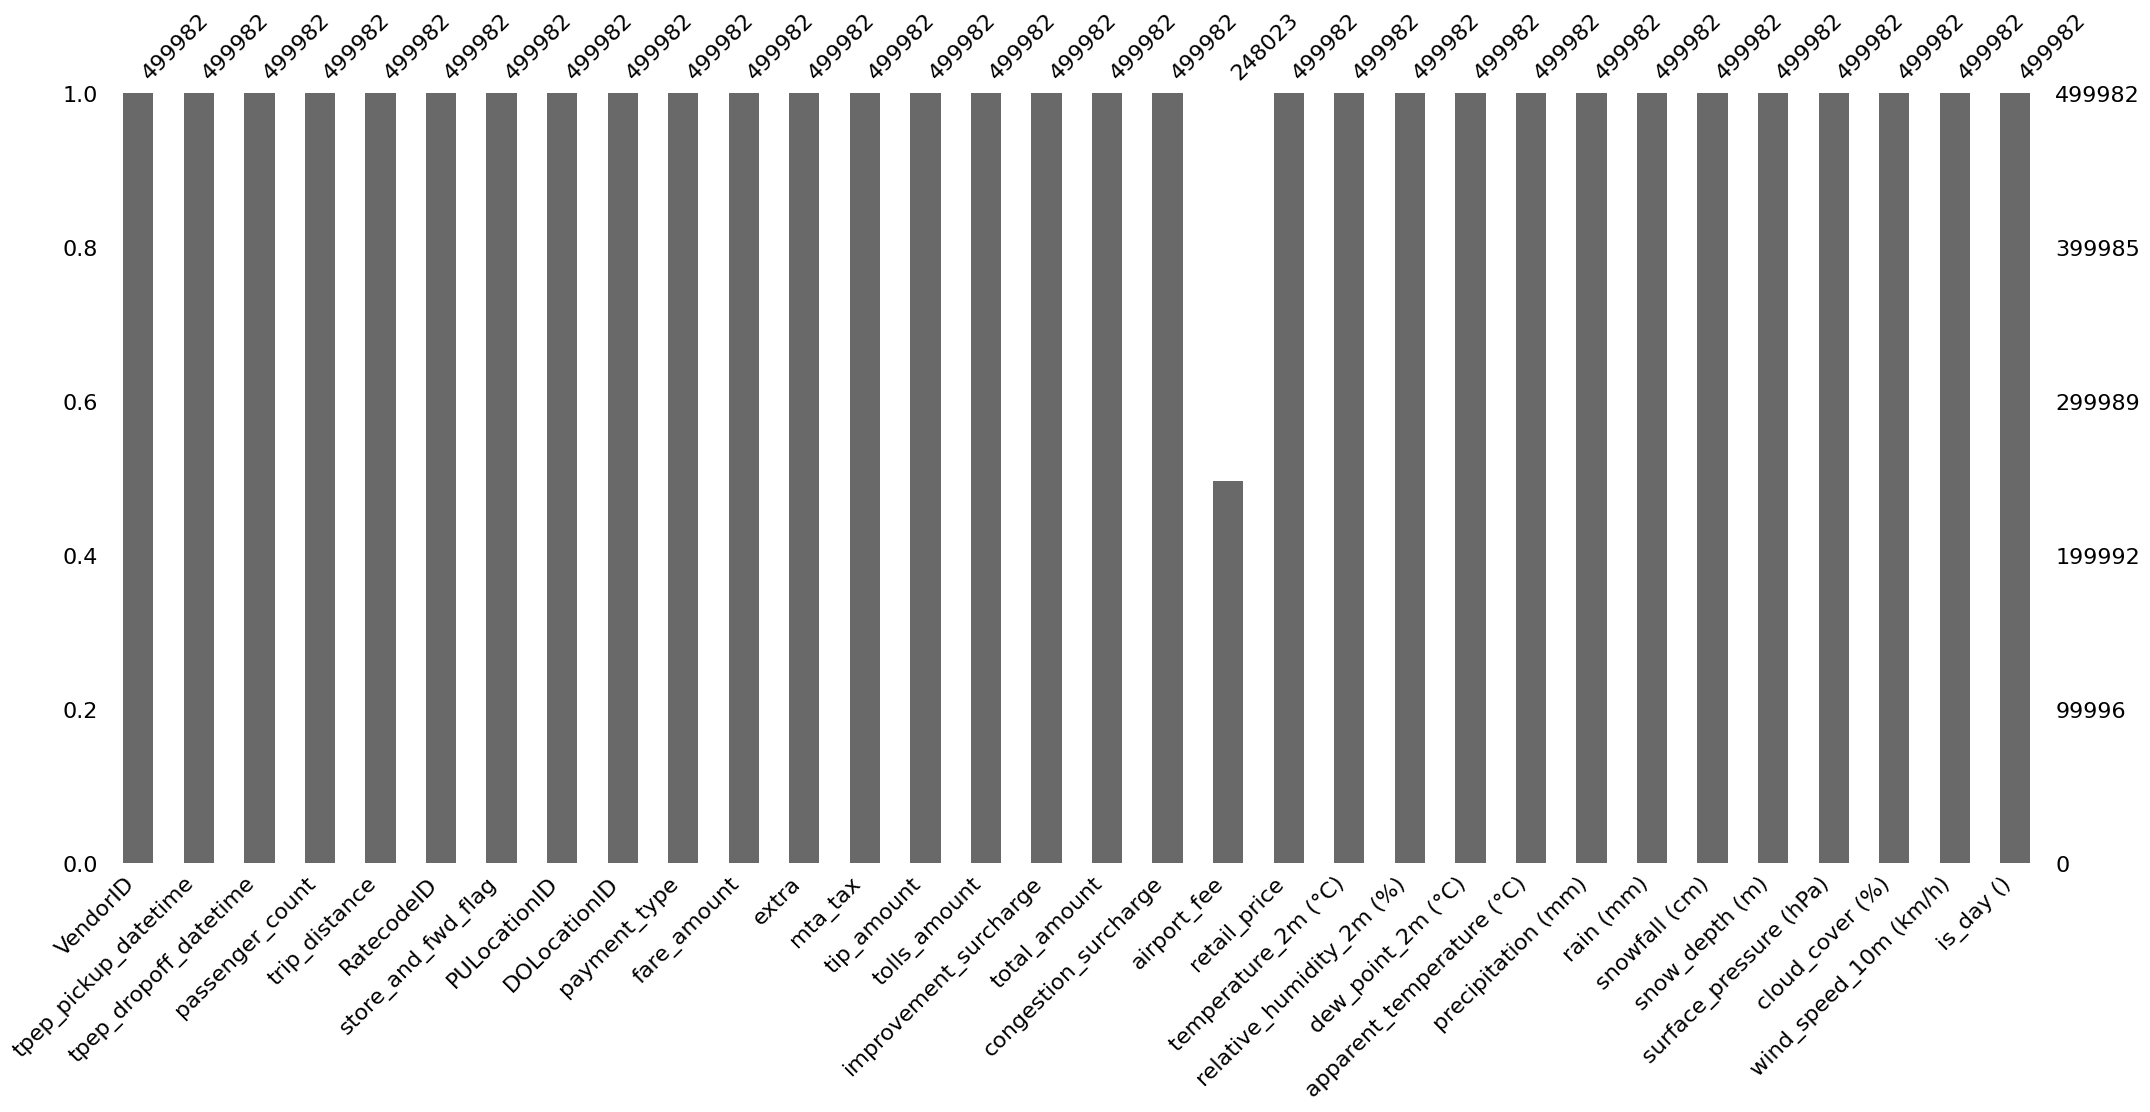

In [42]:
msno.bar(yellow_proportional_samples[1])

<Axes: >

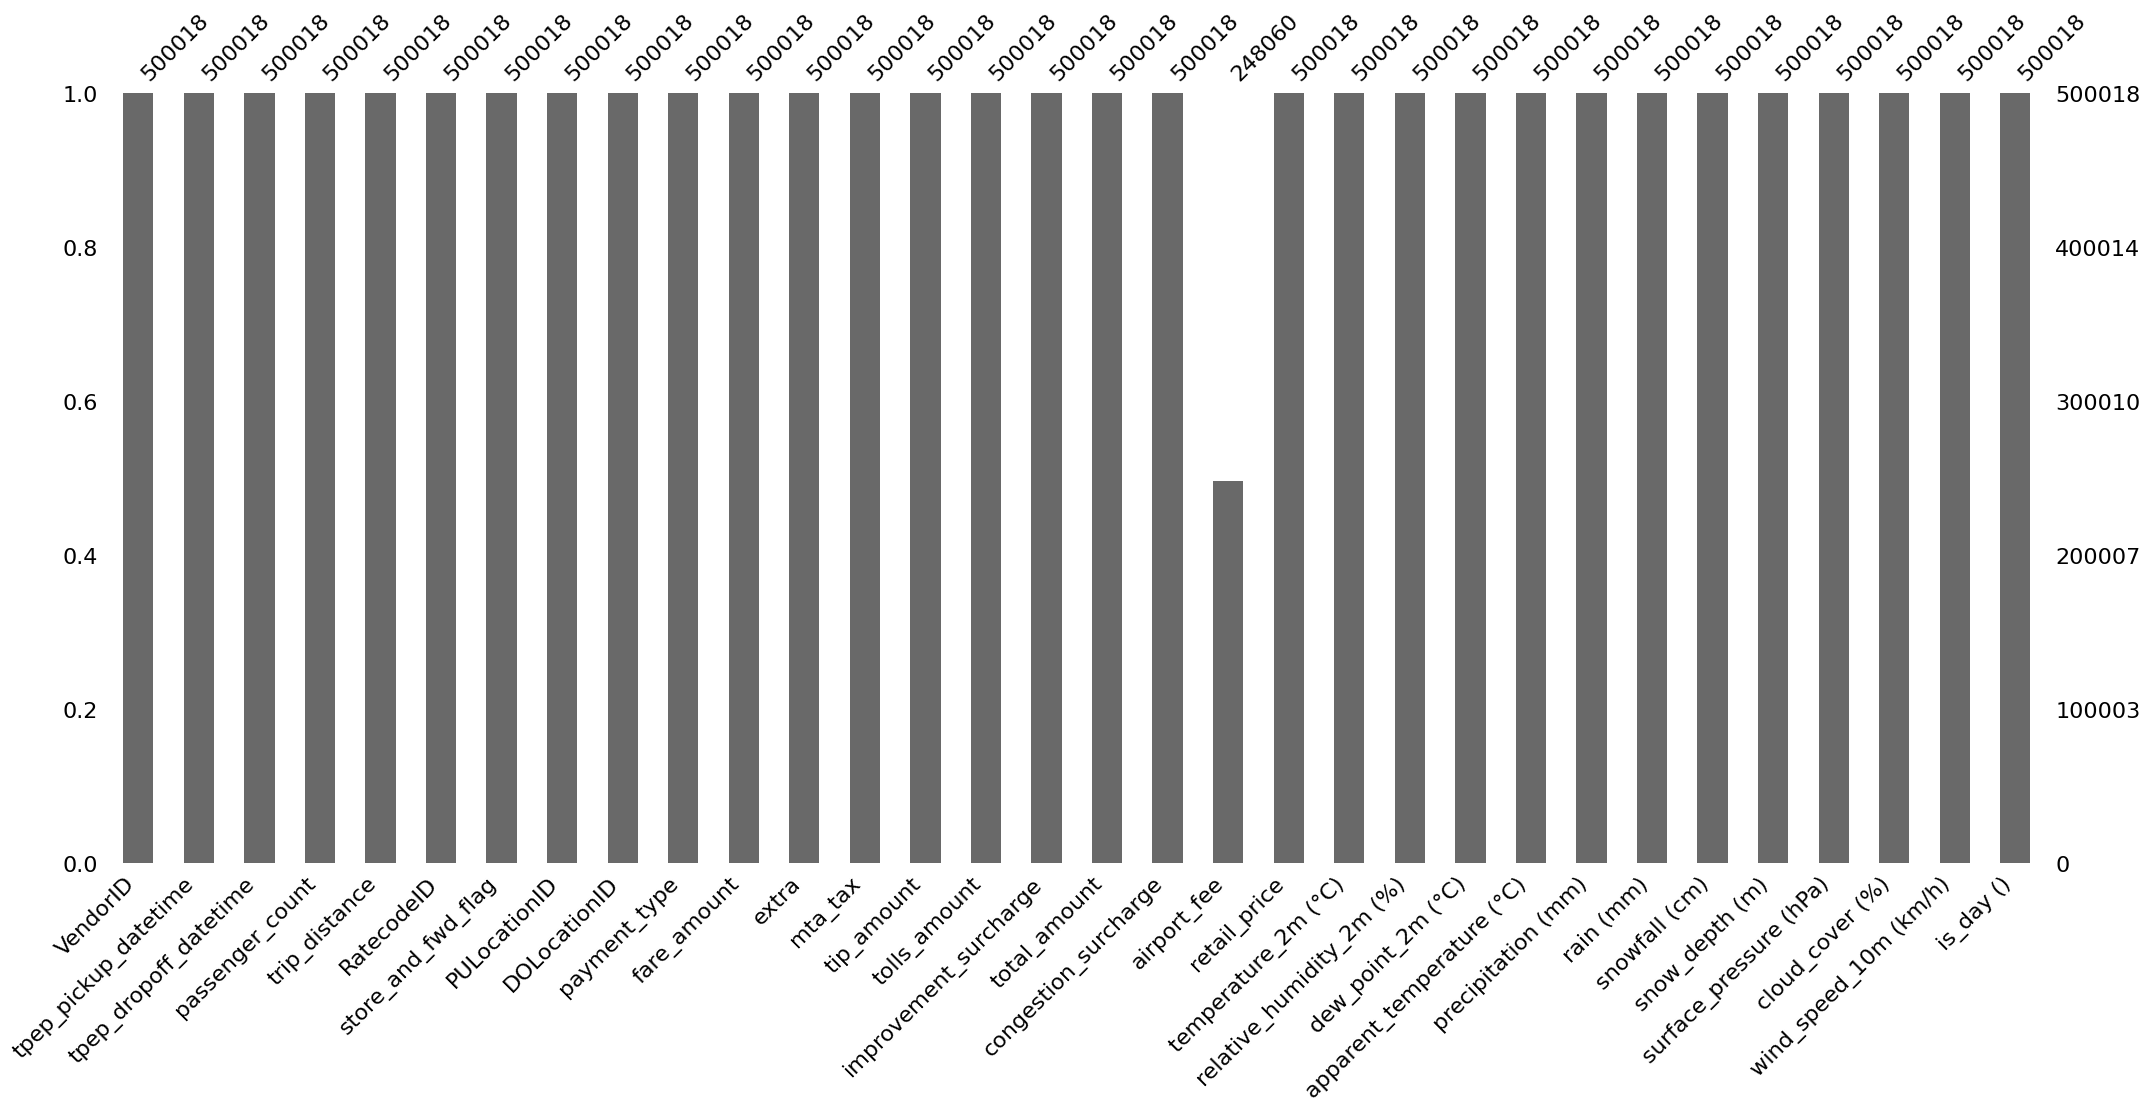

In [43]:
msno.bar(yellow_proportional_samples[2])

In [44]:
vec_type = 'yellow'
yellow_proportional_samples[0].to_csv(f'dataset_nyc_taxi_samples/csv/{vec_type}_train_1M.csv', index=False)
yellow_proportional_samples[1].to_csv(f'dataset_nyc_taxi_samples/csv/{vec_type}_test_500k.csv', index=False)
yellow_proportional_samples[2].to_csv(f'dataset_nyc_taxi_samples/csv/{vec_type}_valid_500k.csv', index=False)

In [45]:
yellow_proportional_samples[0].to_parquet(f'dataset_nyc_taxi_samples/parquet/{vec_type}_train_1M.parquet', index=False)
yellow_proportional_samples[1].to_parquet(f'dataset_nyc_taxi_samples/parquet/{vec_type}_test_500k.parquet', index=False)
yellow_proportional_samples[2].to_parquet(f'dataset_nyc_taxi_samples/parquet/{vec_type}_valid_500k.parquet', index=False)

In [46]:
N_samples = 2 * 10 ** 6
vec_type = 'green'

proportional_samples = get_sample_proportional_monthly(oil_df, weather_df, samples_monthly, years, N_samples, vec_type)
proportional_samples[0]

VendorID lpep_pickup_datetime lpep_dropoff_datetime  \
0              2  2019-02-13 17:01:41   2019-02-13 17:37:01   
1              2  2019-02-07 13:27:28   2019-02-07 14:18:20   
2              2  2019-02-21 16:18:52   2019-02-21 16:24:24   
3              2  2019-02-13 12:15:54   2019-02-13 12:49:14   
4              2  2019-02-09 16:09:02   2019-02-09 16:18:32   
...          ...                  ...                   ...   
999965         1  2023-12-22 12:17:15   2023-12-22 12:32:46   
999966         2  2023-12-15 16:17:44   2023-12-15 16:34:38   
999967         2  2023-12-15 20:58:13   2023-12-15 21:25:36   
999968         2  2023-12-09 17:00:37   2023-12-09 17:16:22   
999969         2  2023-12-23 17:43:18   2023-12-23 18:08:11   

       store_and_fwd_flag  RatecodeID  PULocationID  DOLocationID  \
0                       N         1.0           168           183   
1                       N         5.0            85            42   
2                       N         1.0           212           250   
3                       N         1.0           244           238   
4                       N         1.0           226             7   
...                   ...         ...           ...           ...   
999965                  N         1.0           166           236   
999966                  N         1.0           166           236   
999967                  N         1.0           244            51   
999968                  N         1.0            41           236   
999969                  N         1.0            75           164   

        passenger_count  trip_distance  fare_amount  ...  dew_point_2m (°C)  \
0                   1.0           6.74        27.00  ...               -8.9   
1                   1.0          17.61        51.58  ...                3.8   
2                   1.0           0.88         6.00  ...                0.1   
3                   1.0           4.59        21.50  ...               -6.1   
4                   1.0           1.36         8.00  ...              -14.0   
...                 ...            ...          ...  ...                ...   
999965              2.0           2.60        17.00  ...              -10.2   
999966              1.0           2.50        17.00  ...                3.3   
999967              1.0           9.18        40.10  ...                0.7   
999968              1.0           2.30        16.30  ...                9.0   
999969              1.0           5.32        28.20  ...                1.1   

        apparent_temperature (°C)  precipitation (mm)  rain (mm)  \
0                            -4.9                 0.0        0.0   
1                             3.4                 0.0        0.0   
2                             6.6                 0.0        0.0   
3                            -2.2                 0.0        0.0   
4                            -6.9                 0.0        0.0   
...                           ...                 ...        ...   
999965                       -4.9                 0.0        0.0   
999966                        8.3                 0.0        0.0   
999967                        1.7                 0.0        0.0   
999968                        8.6                 0.0        0.0   
999969                       -0.5                 0.0        0.0   

       snowfall (cm)  snow_depth (m)  surface_pressure (hPa)  cloud_cover (%)  \
0                0.0            0.02                  1000.1              100   
1                0.0            0.00                  1013.1              100   
2                0.0            0.03                  1007.2                4   
3                0.0            0.03                   998.9               88   
4                0.0            0.00                  1029.7                0   
...              ...             ...                     ...              ...   
999965           0.0            0.00                  1026.3               11   
999966  

<Axes: >

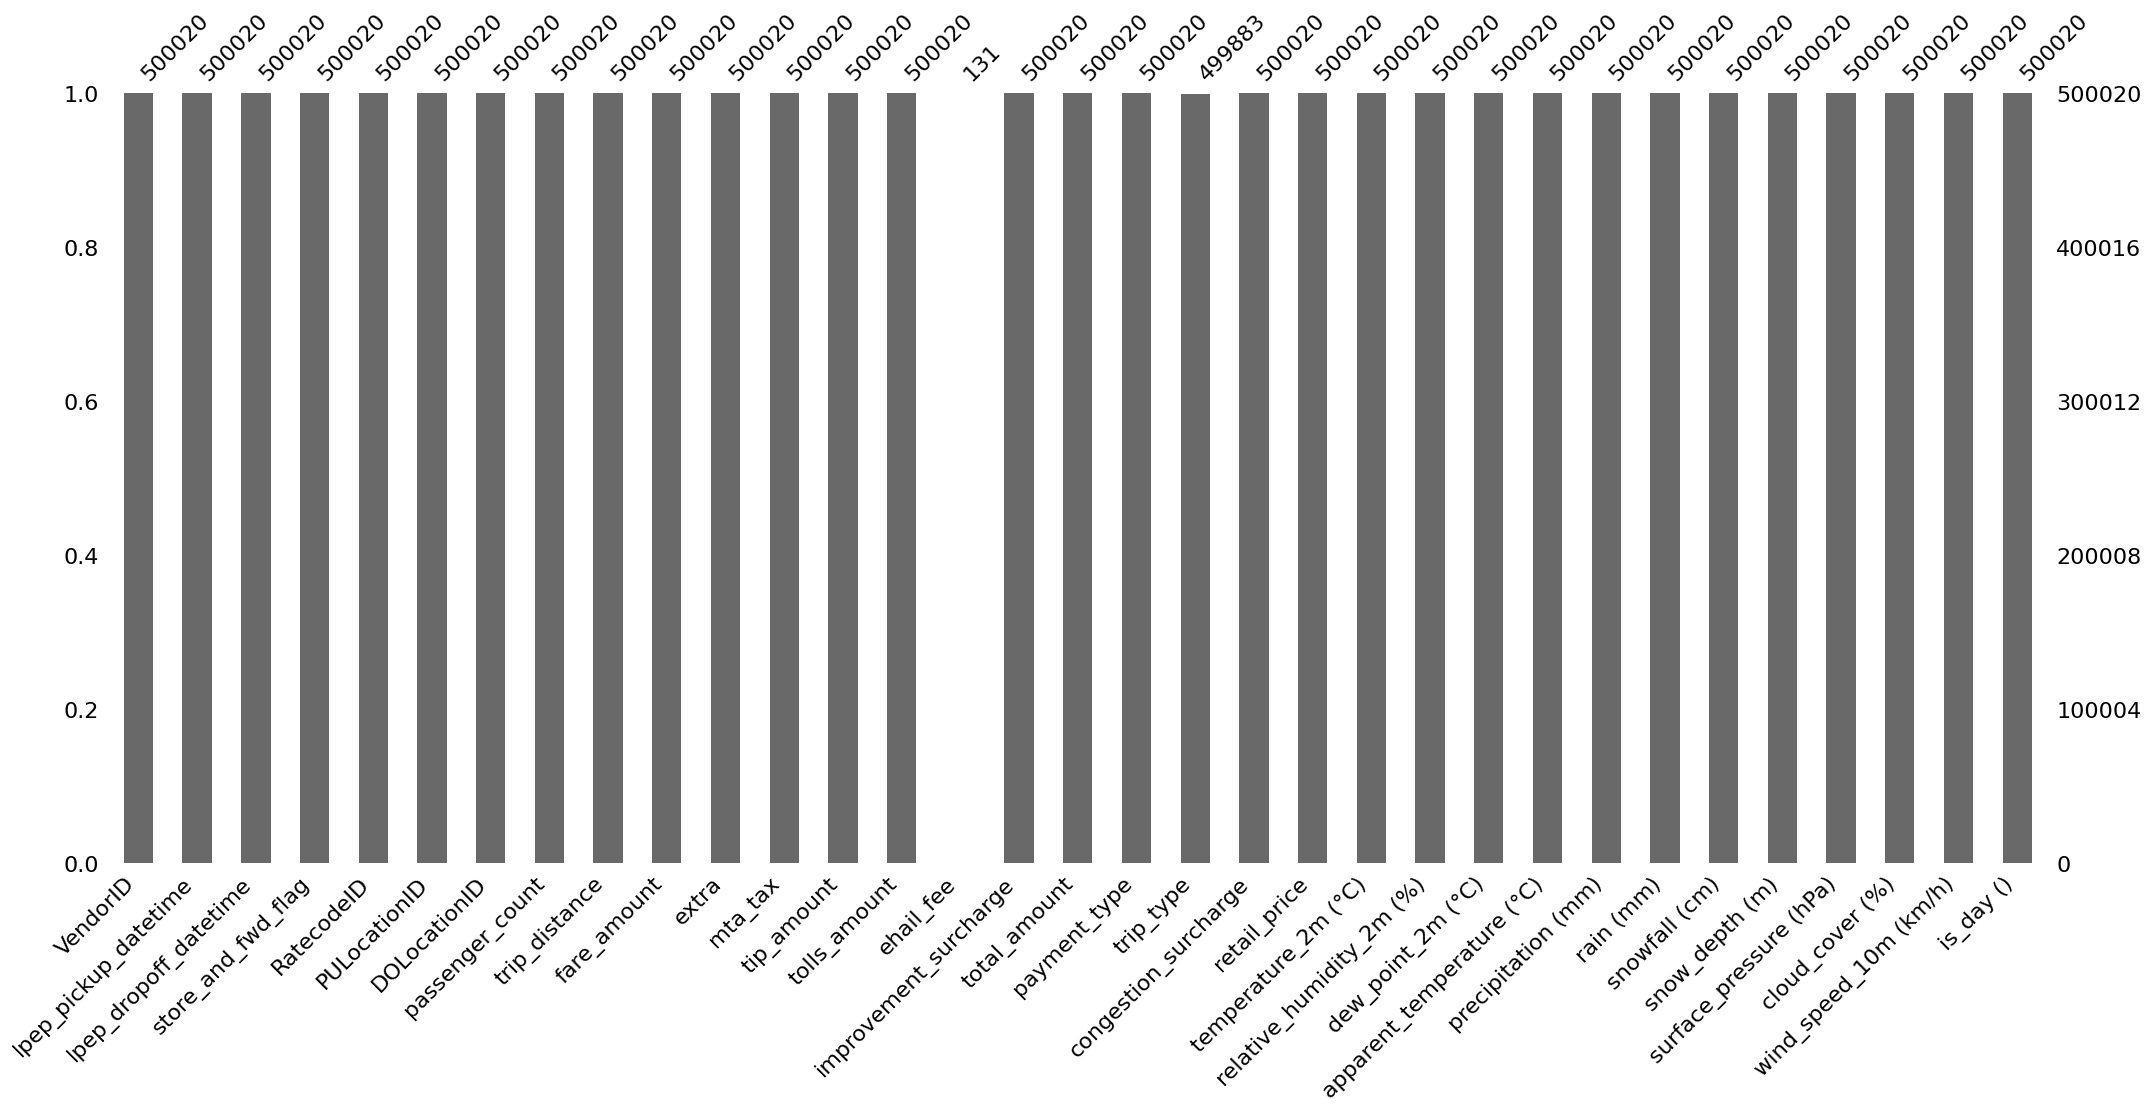

In [47]:
msno.bar(proportional_samples[2])

In [48]:
proportional_samples[0].to_csv(f'dataset_nyc_taxi_samples/csv/{vec_type}_train_1M.csv', index=False)
proportional_samples[1].to_csv(f'dataset_nyc_taxi_samples/csv/{vec_type}_test_500k.csv', index=False)
proportional_samples[2].to_csv(f'dataset_nyc_taxi_samples/csv/{vec_type}_valid_500k.csv', index=False)

proportional_samples[0].to_parquet(f'dataset_nyc_taxi_samples/parquet/{vec_type}_train_1M.parquet', index=False)
proportional_samples[1].to_parquet(f'dataset_nyc_taxi_samples/parquet/{vec_type}_test_500k.parquet', index=False)
proportional_samples[2].to_parquet(f'dataset_nyc_taxi_samples/parquet/{vec_type}_valid_500k.parquet', index=False)

In [23]:
N_samples = 2 * 10 ** 6
vec_type = 'fhv'

proportional_samples = get_sample_proportional_monthly(oil_df, weather_df, samples_monthly, years, N_samples, vec_type)
proportional_samples[0]

hvfhs_license_num dispatching_base_num originating_base_num  \
0                 HV0003               B02764               B02764   
1                 HV0003               B02866               B02866   
2                 HV0003               B02866               B02866   
3                 HV0003               B02875               B02875   
4                 HV0002               B02914               B02914   
...                  ...                  ...                  ...   
999962            HV0005               B03406                 None   
999963            HV0003               B03404               B03404   
999964            HV0003               B03404               B03404   
999965            HV0003               B03404               B03404   
999966            HV0003               B03404               B03404   

          request_datetime   on_scene_datetime     pickup_datetime  \
0      2019-02-09 08:01:12 2019-02-09 08:06:35 2019-02-09 08:08:19   
1      2019-02-26 21:59:29 2019-02-26 22:05:24 2019-02-26 22:06:47   
2      2019-02-08 09:05:02 2019-02-08 09:05:37 2019-02-08 09:12:58   
3      2019-02-03 23:04:43 2019-02-03 23:09:40 2019-02-03 23:11:21   
4      2019-02-22 23:08:37                 NaT 2019-02-22 23:15:33   
...                    ...                 ...                 ...   
999962 2023-12-17 00:28:42                 NaT 2023-12-17 00:37:24   
999963 2023-12-10 20:51:14 2023-12-10 20:55:14 2023-12-10 20:55:16   
999964 2023-12-24 15:11:24 2023-12-24 15:15:22 2023-12-24 15:15:27   
999965 2023-12-08 22:24:13 2023-12-08 22:25:49 2023-12-08 22:26:04   
999966 2023-12-13 14:53:48 2023-12-13 14:55:38 2023-12-13 14:55:54   

          dropoff_datetime  PULocationID  DOLocationID  trip_miles  ...  \
0      2019-02-09 08:38:14            37            62        4.76  ...   
1      2019-02-26 22:19:38           113             4        1.41  ...   
2      2019-02-08 09:34:44           170           114        2.64  ...   
3      2019-02-03 23:31:54           164            79        3.63  ...   
4      2019-02-22 23:20:42           210           123        1.45  ...   
...                    ...           ...           ...         ...  ...   
999962 2023-12-17 00:52:31           262           143        3.36  ...   
999963 2023-12-10 21:17:45           223           256        8.68  ...   
999964 2023-12-24 15:30:43           226            56        4.96  ...   
999965 2023-12-08 22:31:51           220           220        0.95  ...   
999966 2023-12-13 15:04:48           125           231        0.95  ...   

        dew_point_2m (°C)  apparent_temperature (°C)  precipitation (mm)  \
0                   -14.8                      -11.6                 0.0   
1                   -13.7                       -9.4                 0.0   
2                     4.1                        1.3                 1.7   
3                    -1.5                       -4.0                 0.0   
4                    -5.4                       -3.8                 0.0   
...                   ...                        ...                 ...   
999962                4.0                        2.4                 0.0   
999963               14.2                       12.3                 3.0   
999964                4.8                        6.5                 0.0   
999965                2.3                        0.9                 0.0   
999966               -4.6                        2.1                 0.0   

        rain (mm)  snowfall (cm)  snow_depth (m) surface_pressure (hPa)  \
0             0.0            0.0            0.00                 1027.0   
1             0.0            0.0            0.00                 1024.4   
2             1.7            0.0            0.00                 1006.7   
3             0.0            0.0            0.00                 1013.7   
4             0.0            0.0            0.02                 1024.5   
...           ...            ...             ...             

In [24]:
proportional_samples[1]

hvfhs_license_num dispatching_base_num originating_base_num  \
0                 HV0004               B02800                 None   
1                 HV0003               B02883               B02883   
2                 HV0003               B02889               B02889   
3                 HV0005               B02510                 None   
4                 HV0003               B02867               B02867   
...                  ...                  ...                  ...   
499983            HV0003               B03404               B03404   
499984            HV0003               B03404               B03404   
499985            HV0005               B03406                 None   
499986            HV0003               B03404               B03404   
499987            HV0003               B03404               B03404   

          request_datetime   on_scene_datetime     pickup_datetime  \
0      2019-02-27 18:27:56                 NaT 2019-02-27 18:34:27   
1      2019-02-26 14:26:17 2019-02-26 14:26:48 2019-02-26 14:45:59   
2      2019-02-12 20:17:19 2019-02-12 20:24:26 2019-02-12 20:26:26   
3      2019-02-17 09:36:47                 NaT 2019-02-17 09:38:50   
4      2019-02-02 15:33:20 2019-02-02 15:35:48 2019-02-02 15:37:48   
...                    ...                 ...                 ...   
499983 2023-12-26 16:00:37 2023-12-26 16:03:01 2023-12-26 16:04:03   
499984 2023-12-23 02:49:44 2023-12-23 02:53:31 2023-12-23 02:53:46   
499985 2023-12-14 10:16:35                 NaT 2023-12-14 10:23:19   
499986 2023-12-23 21:38:21 2023-12-23 21:41:25 2023-12-23 21:41:51   
499987 2023-12-13 17:00:39 2023-12-13 17:03:28 2023-12-13 17:03:42   

          dropoff_datetime  PULocationID  DOLocationID  trip_miles  ...  \
0      2019-02-27 18:42:32           230           237       0.640  ...   
1      2019-02-26 14:48:37            10            10       0.010  ...   
2      2019-02-12 20:36:20           186           162       1.210  ...   
3      2019-02-17 10:07:04           226           186       5.120  ...   
4      2019-02-02 16:17:31             7            65       6.840  ...   
...                    ...           ...           ...         ...  ...   
499983 2023-12-26 16:21:18            22           123       3.110  ...   
499984 2023-12-23 03:10:51            79           238       4.860  ...   
499985 2023-12-14 10:46:30            37           255       2.711  ...   
499986 2023-12-23 22:26:19            89           216      11.110  ...   
499987 2023-12-13 17:23:35           142           100       1.710  ...   

        dew_point_2m (°C)  apparent_temperature (°C)  precipitation (mm)  \
0                    -7.8                       -7.9                 0.0   
1                   -11.8                       -3.7                 0.0   
2                    -1.1                       -5.5                 1.8   
3                    -9.9                       -7.2                 0.0   
4                   -11.7                       -4.8                 0.0   
...                   ...                        ...                 ...   
499983                5.7                        5.4                 0.0   
499984               -4.6                       -6.7                 0.0   
499985               -5.0                       -3.5                 0.0   
499986                0.3                       -1.8                 0.2   
499987               -5.2                        0.3                 0.0   

        rain (mm)  snowfall (cm)  snow_depth (m) surface_pressure (hPa)  \
0             0.0            0.0            0.00                 1014.9   
1             0.0            0.0            0.00                 1019.3   
2             1.8            0.0            0.04                 1008.0   
3             0.0            0.0            0.00                 1015.8   
4             0.0            0.0            0.01                 1014.1   
...           ...            ...             ...             

In [25]:
proportional_samples[2]

hvfhs_license_num dispatching_base_num originating_base_num  \
0                 HV0005               B02510                 None   
1                 HV0003               B02764               B02764   
2                 HV0003               B02617               B02617   
3                 HV0003               B02765               B02765   
4                 HV0005               B02510                 None   
...                  ...                  ...                  ...   
500010            HV0005               B03406                 None   
500011            HV0003               B03404               B03404   
500012            HV0005               B03406                 None   
500013            HV0003               B03404               B03404   
500014            HV0005               B03406                 None   

          request_datetime   on_scene_datetime     pickup_datetime  \
0      2019-02-24 22:36:46                 NaT 2019-02-24 22:41:53   
1      2019-02-22 02:36:00 2019-02-22 02:36:05 2019-02-22 02:39:26   
2      2019-02-11 02:19:57 2019-02-11 02:21:39 2019-02-11 02:26:45   
3      2019-02-07 08:15:55 2019-02-07 08:16:19 2019-02-07 08:19:58   
4      2019-02-10 10:13:22                 NaT 2019-02-10 10:20:48   
...                    ...                 ...                 ...   
500010 2023-12-20 05:47:01                 NaT 2023-12-20 05:55:21   
500011 2023-12-20 07:40:19 2023-12-20 07:46:33 2023-12-20 07:46:33   
500012 2023-12-31 14:58:37                 NaT 2023-12-31 15:01:23   
500013 2023-12-17 12:50:40 2023-12-17 12:51:50 2023-12-17 12:53:50   
500014 2023-12-09 22:14:08                 NaT 2023-12-09 22:24:28   

          dropoff_datetime  PULocationID  DOLocationID  trip_miles  ...  \
0      2019-02-24 23:19:39           191           191      19.120  ...   
1      2019-02-22 02:47:35            37           256       1.650  ...   
2      2019-02-11 02:44:37            97           265       5.350  ...   
3      2019-02-07 08:28:15           123           108       1.540  ...   
4      2019-02-10 10:28:44           205           130       1.730  ...   
...                    ...           ...           ...         ...  ...   
500010 2023-12-20 06:16:19            33            90       4.598  ...   
500011 2023-12-20 08:14:38           142           265      18.190  ...   
500012 2023-12-31 15:10:55           174            20       1.189  ...   
500013 2023-12-17 13:16:02           181           144       3.770  ...   
500014 2023-12-09 22:28:17           183           184       1.019  ...   

        dew_point_2m (°C)  apparent_temperature (°C)  precipitation (mm)  \
0                    -3.6                       -1.0                 0.0   
1                    -5.1                       -3.2                 0.0   
2                    -9.7                       -5.6                 0.1   
3                     1.7                       -1.4                 0.0   
4                   -12.8                       -8.5                 0.0   
...                   ...                        ...                 ...   
500010               -8.4                       -7.9                 0.0   
500011               -7.8                       -8.0                 0.0   
500012               -3.6                        1.6                 0.0   
500013                8.0                        8.3                 0.0   
500014                6.9                        5.5                 0.0   

        rain (mm)  snowfall (cm)  snow_depth (m) surface_pressure (hPa)  \
0             0.0           0.00            0.00                  992.1   
1             0.0           0.00            0.03                 1017.0   
2             0.0           0.07            0.00                 1021.6   
3             0.0           0.00            0.00                 1011.4   
4             0.0           0.00            0.00                 1032.5   
...           ...            ...             ...             

In [33]:
proportional_samples[0].to_csv(f'dataset_nyc_taxi_samples/csv/{vec_type}_train_1M.csv', index=False)
proportional_samples[1].to_csv(f'dataset_nyc_taxi_samples/csv/{vec_type}_test_500k.csv', index=False)
proportional_samples[2].to_csv(f'dataset_nyc_taxi_samples/csv/{vec_type}_valid_500k.csv', index=False)

proportional_samples[0].to_parquet(f'dataset_nyc_taxi_samples/parquet/{vec_type}_train_1M.parquet', index=False)
proportional_samples[1].to_parquet(f'dataset_nyc_taxi_samples/parquet/{vec_type}_test_500k.parquet', index=False)
proportional_samples[2].to_parquet(f'dataset_nyc_taxi_samples/parquet/{vec_type}_valid_500k.parquet', index=False)

<Axes: >

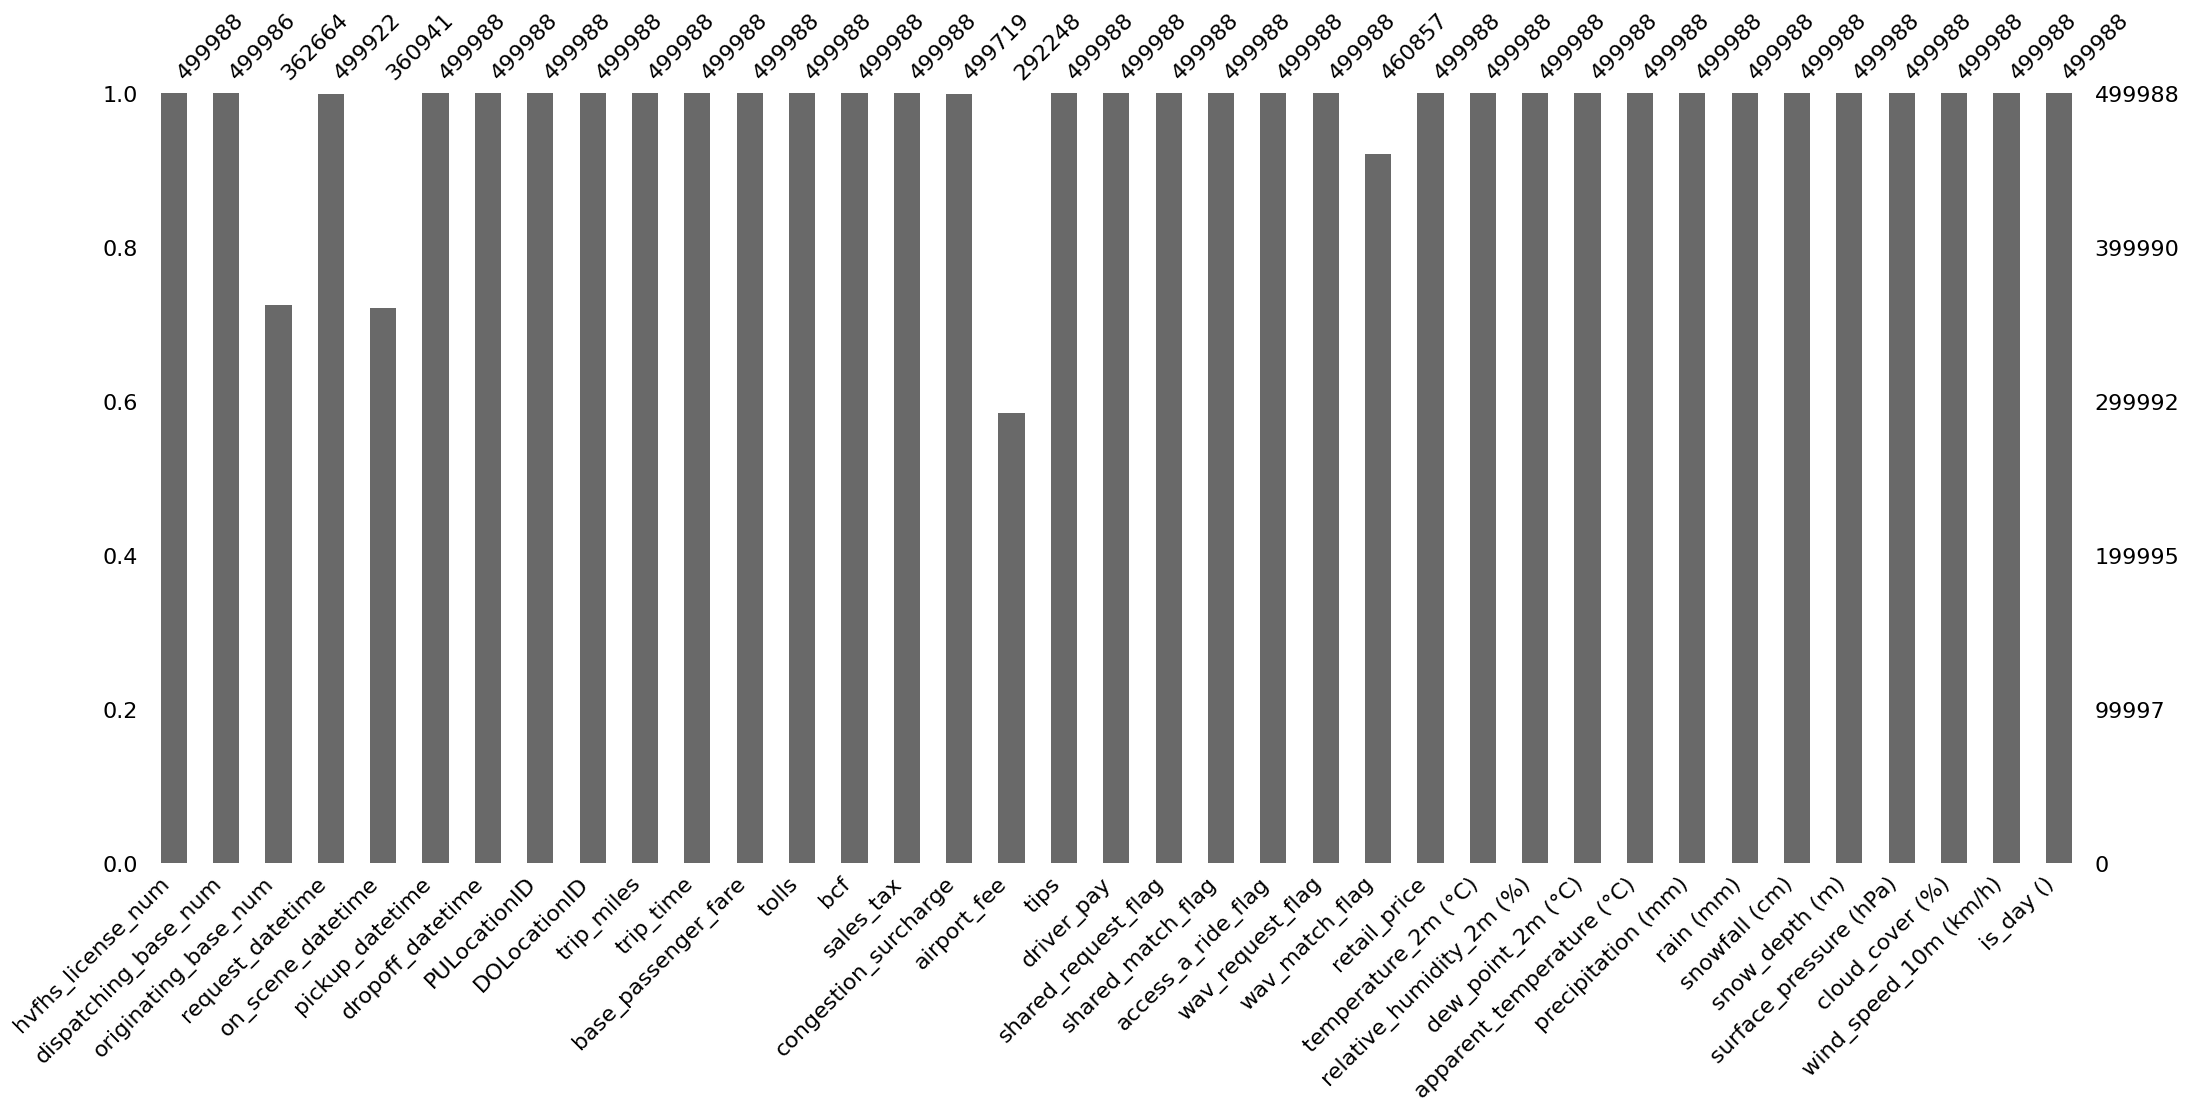

In [28]:
msno.bar(proportional_samples[1])

In [29]:
pd.read_csv(f'dataset_nyc_taxi_samples/csv/fhv_train_1M.csv')

C:\Users\Miko7\AppData\Local\Temp\ipykernel_31992\2795788951.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv(f'dataset_nyc_taxi_samples/csv/fhv_train_1M.csv')


hvfhs_license_num dispatching_base_num originating_base_num  \
0                 HV0003               B02764               B02764   
1                 HV0003               B02866               B02866   
2                 HV0003               B02866               B02866   
3                 HV0003               B02875               B02875   
4                 HV0002               B02914               B02914   
...                  ...                  ...                  ...   
999962            HV0005               B03406                  NaN   
999963            HV0003               B03404               B03404   
999964            HV0003               B03404               B03404   
999965            HV0003               B03404               B03404   
999966            HV0003               B03404               B03404   

           request_datetime    on_scene_datetime      pickup_datetime  \
0       2019-02-09 08:01:12  2019-02-09 08:06:35  2019-02-09 08:08:19   
1       2019-02-26 21:59:29  2019-02-26 22:05:24  2019-02-26 22:06:47   
2       2019-02-08 09:05:02  2019-02-08 09:05:37  2019-02-08 09:12:58   
3       2019-02-03 23:04:43  2019-02-03 23:09:40  2019-02-03 23:11:21   
4       2019-02-22 23:08:37                  NaN  2019-02-22 23:15:33   
...                     ...                  ...                  ...   
999962  2023-12-17 00:28:42                  NaN  2023-12-17 00:37:24   
999963  2023-12-10 20:51:14  2023-12-10 20:55:14  2023-12-10 20:55:16   
999964  2023-12-24 15:11:24  2023-12-24 15:15:22  2023-12-24 15:15:27   
999965  2023-12-08 22:24:13  2023-12-08 22:25:49  2023-12-08 22:26:04   
999966  2023-12-13 14:53:48  2023-12-13 14:55:38  2023-12-13 14:55:54   

           dropoff_datetime  PULocationID  DOLocationID  trip_miles  ...  \
0       2019-02-09 08:38:14            37            62        4.76  ...   
1       2019-02-26 22:19:38           113             4        1.41  ...   
2       2019-02-08 09:34:44           170           114        2.64  ...   
3       2019-02-03 23:31:54           164            79        3.63  ...   
4       2019-02-22 23:20:42           210           123        1.45  ...   
...                     ...           ...           ...         ...  ...   
999962  2023-12-17 00:52:31           262           143        3.36  ...   
999963  2023-12-10 21:17:45           223           256        8.68  ...   
999964  2023-12-24 15:30:43           226            56        4.96  ...   
999965  2023-12-08 22:31:51           220           220        0.95  ...   
999966  2023-12-13 15:04:48           125           231        0.95  ...   

        dew_point_2m (°C)  apparent_temperature (°C)  precipitation (mm)  \
0                   -14.8                      -11.6                 0.0   
1                   -13.7                       -9.4                 0.0   
2                     4.1                        1.3                 1.7   
3                    -1.5                       -4.0                 0.0   
4                    -5.4                       -3.8                 0.0   
...                   ...                        ...                 ...   
999962                4.0                        2.4                 0.0   
999963               14.2                       12.3                 3.0   
999964                4.8                        6.5                 0.0   
999965                2.3                        0.9                 0.0   
999966               -4.6                        2.1                 0.0   

        rain (mm)  snowfall (cm)  snow_depth (m)  surface_pressure (hPa)  \
0             0.0            0.0            0.00                  1027.0   
1             0.0            0.0            0.00                  1024.4   
2             1.7            0.0            0.00                  1006.7   
3             0.0            0.0            0.00                  1013.7   
4             0.0            0.0            0.02                  1024.5   
...    

In [31]:
pd.read_csv(f'dataset_nyc_taxi_samples/csv/green_valid_500k.csv')

VendorID lpep_pickup_datetime lpep_dropoff_datetime  \
0              2  2019-02-09 18:17:16   2019-02-09 18:54:07   
1              2  2019-02-04 19:40:14   2019-02-04 20:04:31   
2              2  2019-02-27 10:29:31   2019-02-27 11:01:07   
3              2  2019-02-10 08:01:18   2019-02-10 08:18:04   
4              2  2019-02-18 17:57:29   2019-02-18 18:04:44   
...          ...                  ...                   ...   
500015         2  2023-12-06 17:23:43   2023-12-06 17:27:14   
500016         2  2023-12-01 07:35:47   2023-12-01 07:46:50   
500017         2  2023-12-16 07:34:19   2023-12-16 07:43:23   
500018         2  2023-12-09 11:11:58   2023-12-09 11:24:23   
500019         2  2023-12-29 19:33:48   2023-12-29 19:46:50   

       store_and_fwd_flag  RatecodeID  PULocationID  DOLocationID  \
0                       N         1.0           243           141   
1                       N         1.0            66            75   
2                       N         5.0            39            14   
3                       N         1.0            33           162   
4                       N         1.0            49            65   
...                   ...         ...           ...           ...   
500015                  N         1.0           166           151   
500016                  N         1.0            74            75   
500017                  N         1.0            74            75   
500018                  N         1.0             7           223   
500019                  N         1.0            74           236   

        passenger_count  trip_distance  fare_amount  ...  dew_point_2m (°C)  \
0                   1.0           8.44        30.50  ...              -13.2   
1                   3.0           9.90        30.00  ...                1.9   
2                   1.0          12.64        35.36  ...              -13.3   
3                   1.0           7.88        24.00  ...              -12.1   
4                   1.0           1.16         7.00  ...               -7.2   
...                 ...            ...          ...  ...                ...   
500015              1.0           0.00         5.10  ...               -6.6   
500016              1.0           1.63        12.10  ...               -1.5   
500017              1.0           1.53        10.70  ...               -0.8   
500018              1.0           2.02        12.80  ...                8.1   
500019              1.0           2.52        14.90  ...                3.8   

        apparent_temperature (°C)  precipitation (mm)  rain (mm)  \
0                            -6.9                 0.0        0.0   
1                            -0.3                 0.0        0.0   
2                            -8.2                 0.1        0.0   
3                           -10.6                 0.0        0.0   
4                            -4.7                 0.0        0.0   
...                           ...                 ...        ...   
500015                       -2.4                 0.0        0.0   
500016                       -4.3                 0.0        0.0   
500017                       -0.7                 0.0        0.0   
500018                        9.3                 0.0        0.0   
500019                        3.9                 0.0        0.0   

        snowfall (cm)  snow_depth (m)  surface_pressure (hPa)  \
0                0.00            0.00                  1030.6   
1                0.00            0.00                  1009.6   
2                0.07            0.00                  1024.6   
3                0.00            0.00                  1032.5   
4                0.00            0.01                  1009.8   
...               ...             ...                     ...   
500015           0.00            0.00                  1008.6   
500016           0.00            0.00                  1015.0   
500017           0.00            0.00                  1024.5   
500018

In [32]:
pd.read_csv(f'dataset_nyc_taxi_samples/csv/yellow_test_500k.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'dataset_nyc_taxi_samples/csv/yellow_test_500k.csv'

In [13]:
from tqdm import tqdm

tqdm.pandas()

In [14]:
from pandarallel import pandarallel

pandarallel.initialize(progress_bar=False, nb_workers=16)

INFO: Pandarallel will run on 16 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [39]:
N = 1000
rs = 42

def get_samples_month_by_month(vechicle_type, oil_df, weather_df):
    dfs_to_concat = []
    for year in months_in_years.keys():
        filepaths = prepare_file_paths(year, vechicle_type)
        months = months_in_years[year]
        for i in tqdm(range(len(filepaths)), total=len(filepaths), desc=str(year)):
            month_df = pd.read_parquet(filepaths[i])
            choosen_df = month_df[month_df['payment_type'] == 1].sample(N, random_state=rs).copy()
            
            choosen_df['nearest_date'] = choosen_df['lpep_pickup_datetime'].parallel_apply(lambda x: oil_df.iloc[(oil_df['date']-x).abs().argsort()[:1]]['date'].values[0])
            merged_oil_df = pd.merge(choosen_df, oil_df, how='left', left_on='nearest_date', right_on='date')
            merged_oil_df = merged_oil_df.drop(columns = ['nearest_date', 'date'])
            
            merged_oil_df['nearest_date'] = merged_oil_df['lpep_pickup_datetime'].parallel_apply(lambda x: weather_df.iloc[(weather_df['time']-x).abs().argsort()[:1]]['time'].values[0])
            merged_oil_weather_df = pd.merge(merged_oil_df, weather_df, how='left', left_on='nearest_date', right_on='time')
            merged_oil_weather_df = merged_oil_weather_df.drop(columns = ['nearest_date', 'time'])
       
            dfs_to_concat.append(merged_oil_weather_df)
    
    samples_df = pd.concat(dfs_to_concat, ignore_index=True)
            
    return samples_df

In [40]:
choosen_df = get_samples_month_by_month('green', oil_df, weather_df)
choosen_df

2023: 100%|██████████| 12/12 [01:12<00:00,  6.08s/it]
/tmp/ipykernel_38919/756660734.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  samples_df = pd.concat(dfs_to_concat, ignore_index=True)


VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0             2  2019-07-22 08:03:41   2019-07-22 08:10:15                  N   
1             2  2019-07-11 06:56:09   2019-07-11 07:09:38                  N   
2             2  2019-07-19 16:06:07   2019-07-19 17:21:48                  N   
3             2  2019-07-19 02:45:29   2019-07-19 02:53:49                  N   
4             2  2019-07-15 18:38:47   2019-07-15 18:53:36                  N   
...         ...                  ...                   ...                ...   
58995         2  2023-07-15 01:23:17   2023-07-15 01:27:29                  N   
58996         2  2023-07-19 10:56:05   2023-07-19 11:08:01                  N   
58997         2  2023-07-29 20:09:18   2023-07-29 20:14:21                  N   
58998         2  2023-07-10 10:54:27   2023-07-10 11:14:20                  N   
58999         2  2023-07-31 17:32:50   2023-07-31 18:02:36                  N   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0             1.0            74           168              2.0           1.37   
1             1.0           145           129              2.0           6.18   
2             1.0           197            65              1.0          17.25   
3             1.0            97            61              1.0           1.57   
4             1.0            82           226              1.0           2.93   
...           ...           ...           ...              ...            ...   
58995         1.0           134           134              1.0           0.91   
58996         1.0            41           239              1.0           2.57   
58997         1.0            75           263              1.0           1.09   
58998         1.0            74           262              1.0           2.68   
58999         1.0             7           160              1.0           5.71   

       fare_amount  ...  dew_point_2m (°C)  apparent_temperature (°C)  \
0              6.5  ...               24.0                       31.9   
1             18.5  ...               19.0                       25.6   
2             60.5  ...               24.7                       36.9   
3              8.0  ...               21.0                       25.6   
4             13.0  ...               17.8                       29.4   
...            ...  ...                ...                        ...   
58995          6.5  ...               21.0                       23.5   
58996         14.9  ...               19.9                       28.2   
58997          7.9  ...               20.0                       29.4   
58998         19.1  ...               20.3                       26.7   
58999         30.3  ...               15.1                       26.1   

       precipitation (mm)  rain (mm)  snowfall (cm)  snow_depth (m)  \
0                     0.0        0.0            0.0             0.0   
1                     0.0        0.0            0.0             0.0   
2                     0.0        0.0            0.0             0.0   
3                     0.0        0.0            0.0             0.0   
4                     0.0        0.0            0.0             0.0   
...                   ...        ...            ...             ...   
58995                 1.3        1.3            0.0             0.0   
58996                 0.1        0.1            0.0             0.0   
58997                 2.0        2.0            0.0             0.0   
58998                 0.0        0.0            0.0             0.0   
58999                 0.0        0.0            0.0             0.0   

       surface_pressure (hPa)  cloud_cover (%)  wind_speed_10m (km/h)  \
0                      1005.0               40                    7.1   
1                      1009.2               26                    4.7   
2                      1004.3               29                   14.6   
3                      1005.9          

In [ ]:
choosen_df['nearest_date'] = choosen_df['lpep_pickup_datetime'].apply(lambda x: oil_df.iloc[(oil_df['date']-x).abs().argsort()[:1]]['date'].values[0])
merged_oil_df = pd.merge(choosen_df, oil_df, how='left', left_on='nearest_date', right_on='date')
merged_oil_df = merged_oil_df.drop(columns = ['nearest_date', 'date'])
merged_oil_df

In [ ]:
merged_oil_df['nearest_date'] = merged_oil_df['lpep_pickup_datetime'].apply(lambda x: weather_df.iloc[(weather_df['time']-x).abs().argsort()[:1]]['time'].values[0])
merged_oil_weather_df = pd.merge(merged_oil_df, weather_df, how='left', left_on='nearest_date', right_on='time')
merged_oil_weather_df = merged_oil_weather_df.drop(columns = ['nearest_date', 'time'])
merged_oil_weather_df

In [41]:
choosen_df.isna().sum()

VendorID                         0
lpep_pickup_datetime             0
lpep_dropoff_datetime            0
store_and_fwd_flag               0
RatecodeID                       0
PULocationID                     0
DOLocationID                     0
passenger_count                  0
trip_distance                    0
fare_amount                      0
extra                            0
mta_tax                          0
tip_amount                       0
tolls_amount                     0
ehail_fee                    58996
improvement_surcharge            0
total_amount                     0
payment_type                     0
trip_type                        5
congestion_surcharge             0
retail_price                     0
temperature_2m (°C)              0
relative_humidity_2m (%)         0
dew_point_2m (°C)                0
apparent_temperature (°C)        0
precipitation (mm)               0
rain (mm)                        0
snowfall (cm)                    0
snow_depth (m)      

In [42]:
choosen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59000 entries, 0 to 58999
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   VendorID                   59000 non-null  int64         
 1   lpep_pickup_datetime       59000 non-null  datetime64[us]
 2   lpep_dropoff_datetime      59000 non-null  datetime64[us]
 3   store_and_fwd_flag         59000 non-null  object        
 4   RatecodeID                 59000 non-null  float64       
 5   PULocationID               59000 non-null  int64         
 6   DOLocationID               59000 non-null  int64         
 7   passenger_count            59000 non-null  float64       
 8   trip_distance              59000 non-null  float64       
 9   fare_amount                59000 non-null  float64       
 10  extra                      59000 non-null  float64       
 11  mta_tax                    59000 non-null  float64       
 12  tip_

In [52]:
choosen_df["store_and_fwd_flag"] = choosen_df["store_and_fwd_flag"].map({'N':0, 'Y':1})

In [68]:
import geopandas as gpd

shapefile = gpd.read_file("../taxi_zones")

location_to_borough_mapping = dict(zip(shapefile['LocationID'], shapefile['borough']))
location_to_borough_idx_mapping = dict(zip(shapefile['LocationID'], shapefile['borough'].map({'Manhattan': 0, 'Queens': 1, 'Brooklyn': 2, 'Bronx': 3, 'EWR': 4, 'Staten Island': 5})))

choosen_df["PULocationBorough"] = choosen_df.PULocationID.map(location_to_borough_idx_mapping)
choosen_df["DOLocationBorough"] = choosen_df.DOLocationID.map(location_to_borough_idx_mapping)

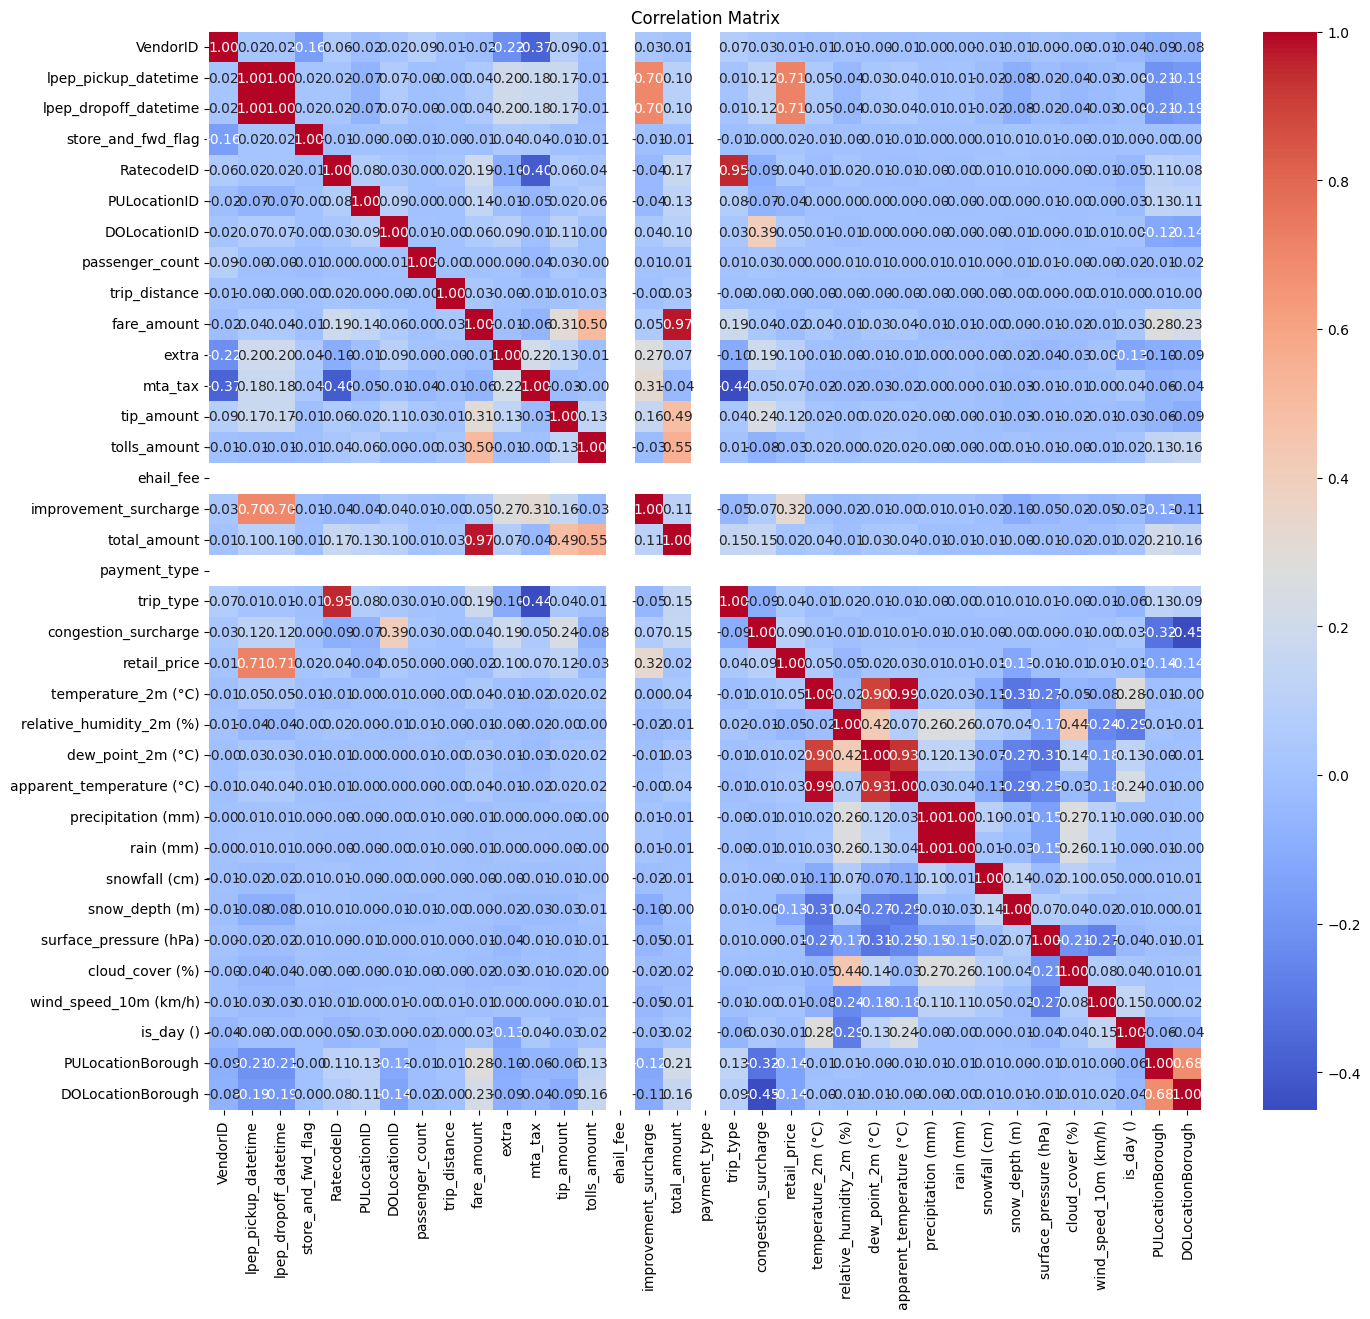

In [69]:
correlation_matrix = choosen_df.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

In [70]:
choosen_df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge',
       'retail_price', 'temperature_2m (°C)', 'relative_humidity_2m (%)',
       'dew_point_2m (°C)', 'apparent_temperature (°C)', 'precipitation (mm)',
       'rain (mm)', 'snowfall (cm)', 'snow_depth (m)',
       'surface_pressure (hPa)', 'cloud_cover (%)', 'wind_speed_10m (km/h)',
       'is_day ()', 'PULocationBorough', 'DOLocationBorough'],
      dtype='object')

In [ ]:
! pip install missingno

<Axes: >

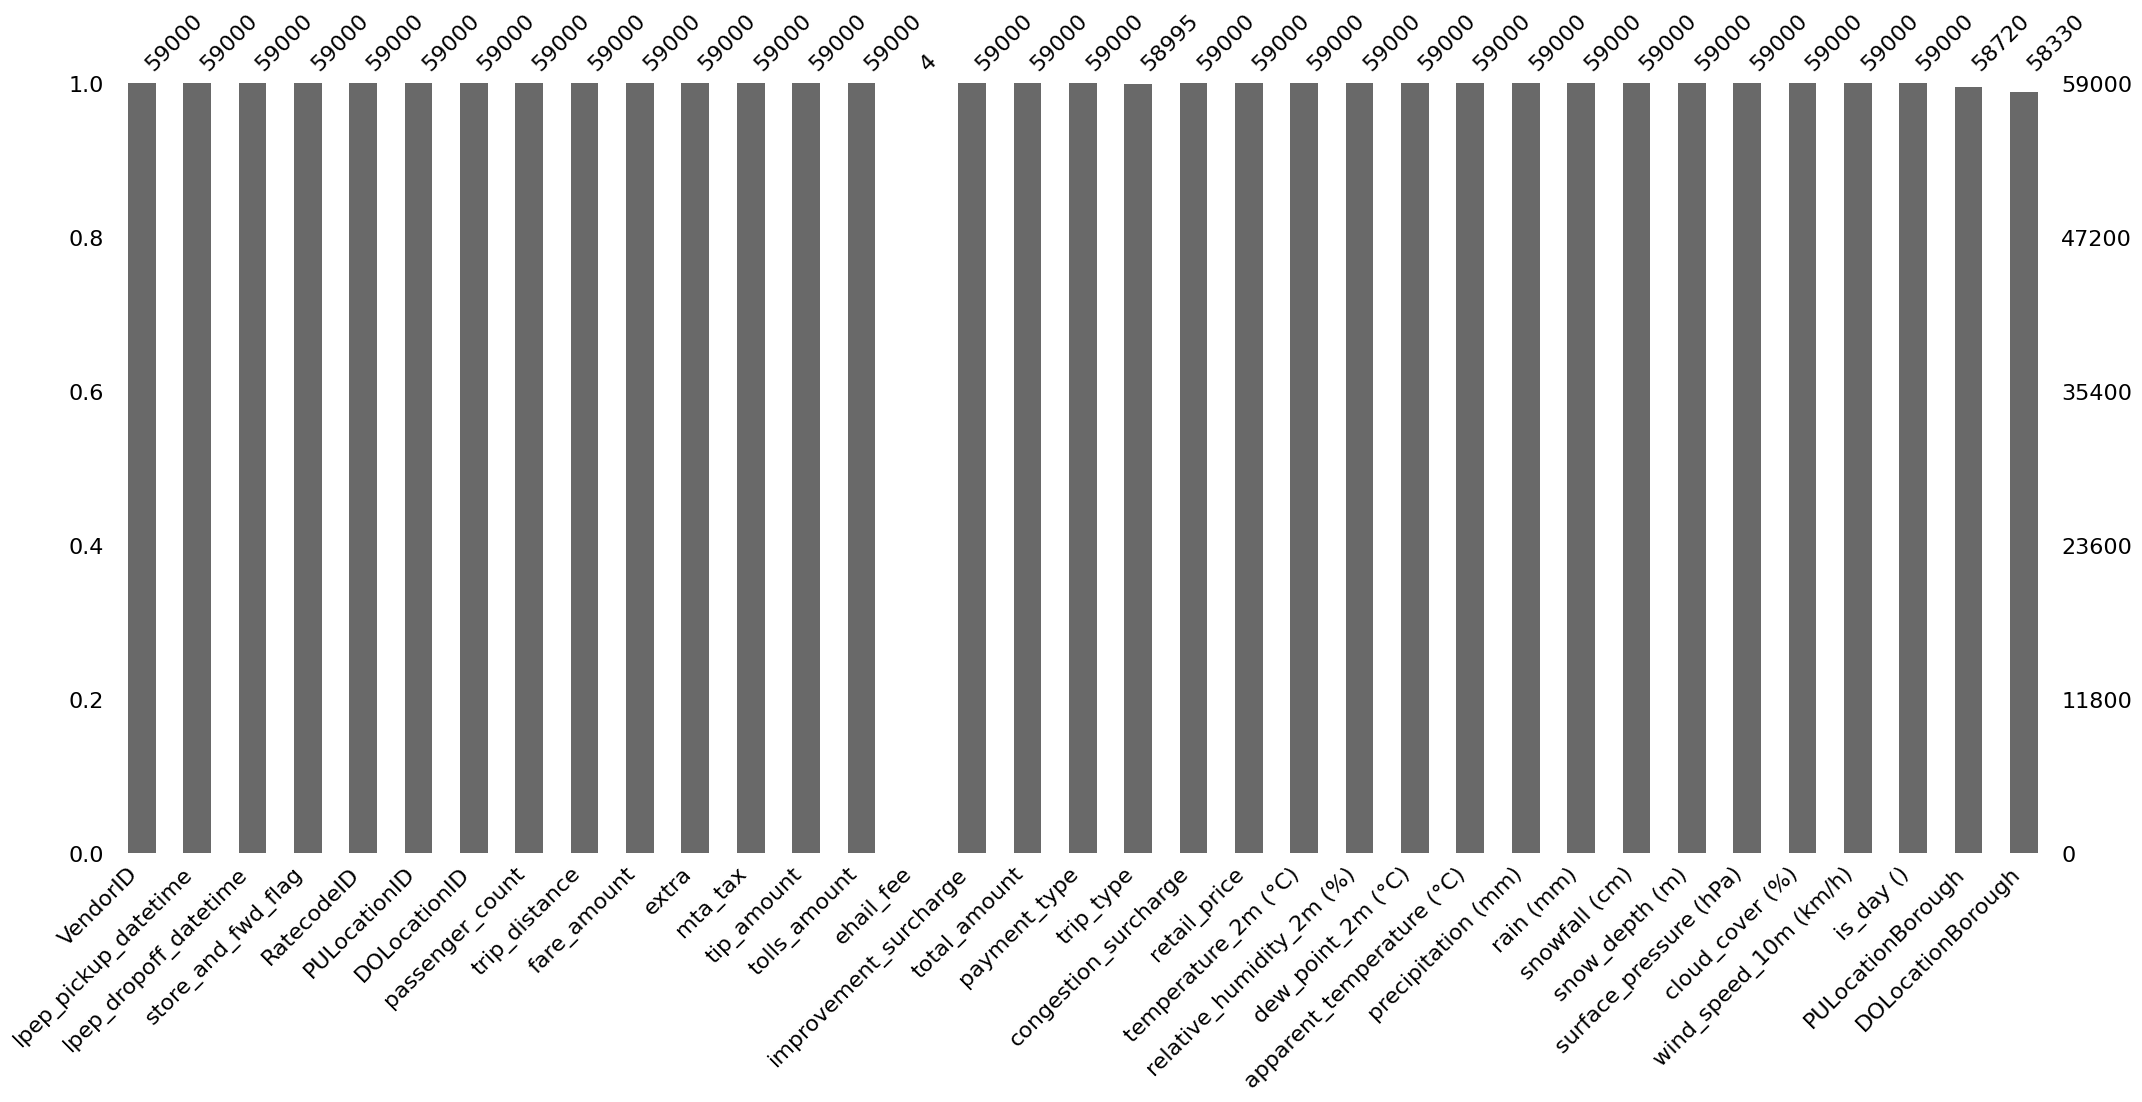

In [71]:
import missingno as msno

msno.bar(choosen_df)

In [72]:
green_sample_df = choosen_df[['tip_amount', 'VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 
       'tolls_amount', 'improvement_surcharge',
       'total_amount', 'trip_type', 'congestion_surcharge',
       'retail_price', 'temperature_2m (°C)', 'relative_humidity_2m (%)',
       'apparent_temperature (°C)', 'rain (mm)', 'snowfall (cm)', 'snow_depth (m)',
       'surface_pressure (hPa)', 'cloud_cover (%)', 'wind_speed_10m (km/h)',
       'is_day ()', 'PULocationBorough', 'DOLocationBorough']]

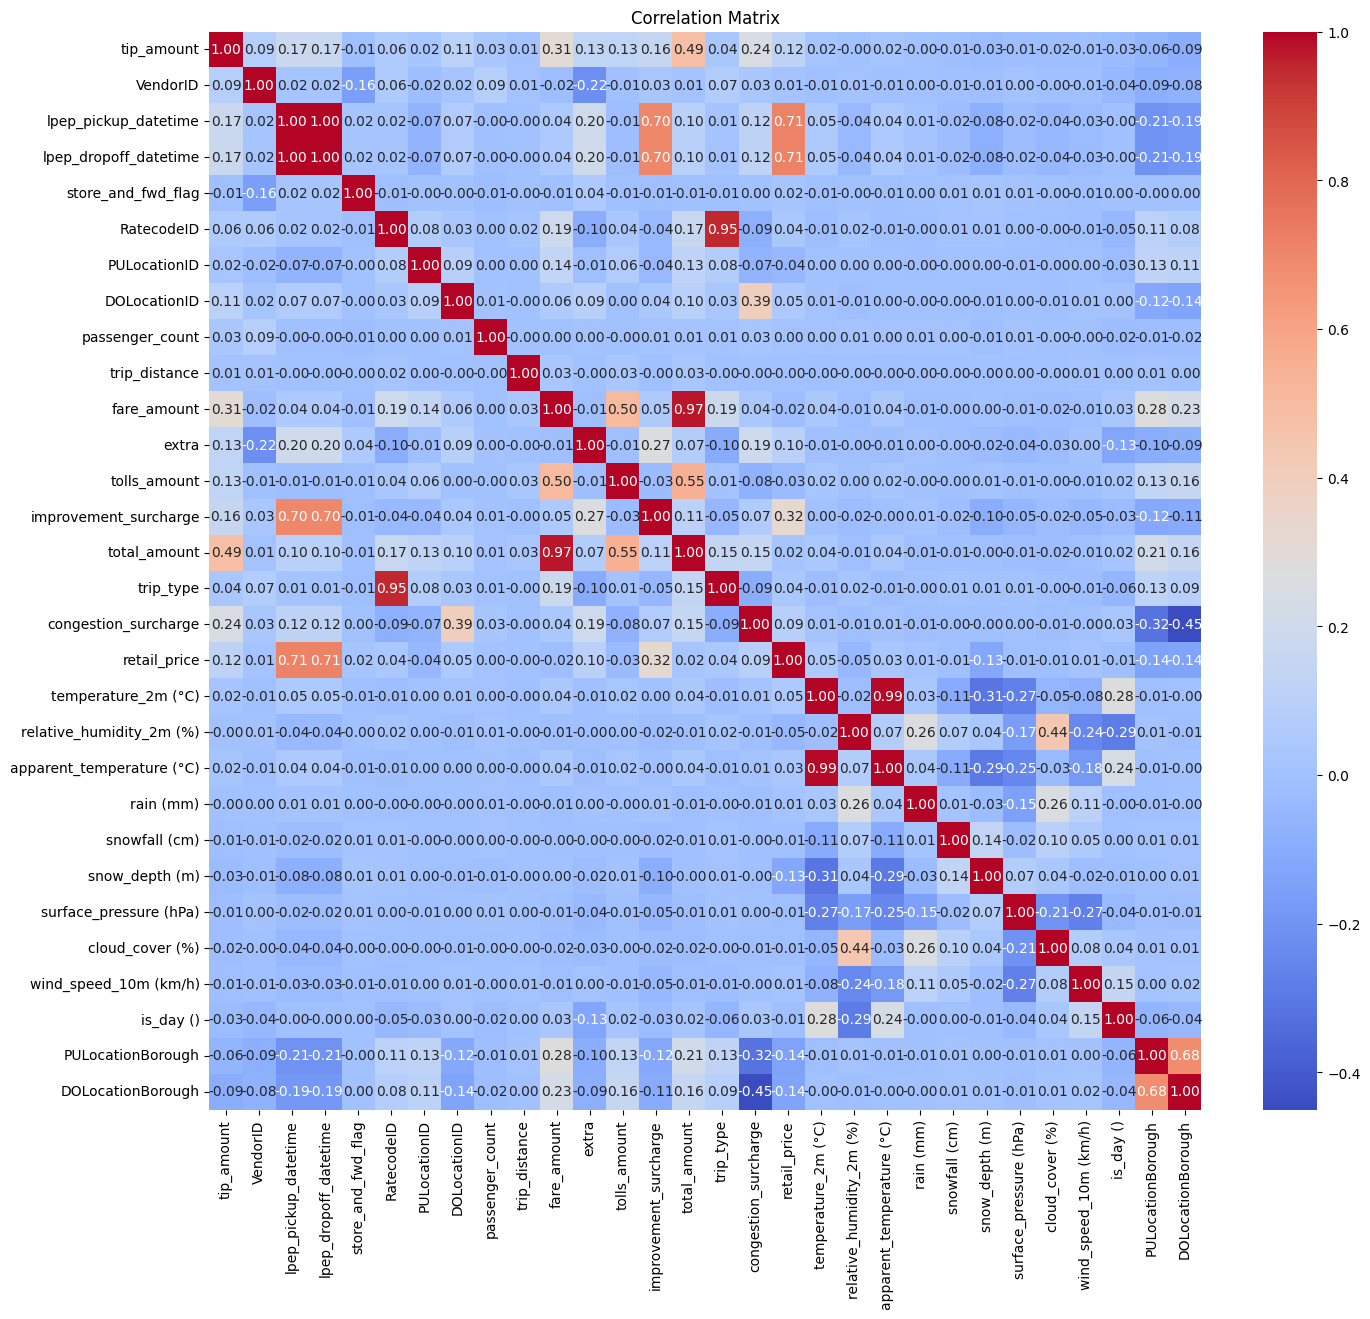

In [73]:
correlation_matrix = green_sample_df.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

In [75]:
green_sample_df['year'] = green_sample_df['lpep_pickup_datetime'].dt.year
green_sample_df['month'] = green_sample_df['lpep_pickup_datetime'].dt.month
green_sample_df['weekday'] = green_sample_df['lpep_pickup_datetime'].dt.weekday
green_sample_df['hour'] = green_sample_df['lpep_pickup_datetime'].dt.hour
green_sample_df

/tmp/ipykernel_38919/139812122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  green_sample_df['year'] = green_sample_df['lpep_pickup_datetime'].dt.year
/tmp/ipykernel_38919/139812122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  green_sample_df['month'] = green_sample_df['lpep_pickup_datetime'].dt.month
/tmp/ipykernel_38919/139812122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

tip_amount  VendorID lpep_pickup_datetime lpep_dropoff_datetime  \
0            2.19         2  2019-07-22 08:03:41   2019-07-22 08:10:15   
1            4.82         2  2019-07-11 06:56:09   2019-07-11 07:09:38   
2            0.00         2  2019-07-19 16:06:07   2019-07-19 17:21:48   
3            1.86         2  2019-07-19 02:45:29   2019-07-19 02:53:49   
4            2.20         2  2019-07-15 18:38:47   2019-07-15 18:53:36   
...           ...       ...                  ...                   ...   
58995        1.80         2  2023-07-15 01:23:17   2023-07-15 01:27:29   
58996        3.83         2  2023-07-19 10:56:05   2023-07-19 11:08:01   
58997        3.29         2  2023-07-29 20:09:18   2023-07-29 20:14:21   
58998        4.53         2  2023-07-10 10:54:27   2023-07-10 11:14:20   
58999        5.00         2  2023-07-31 17:32:50   2023-07-31 18:02:36   

       store_and_fwd_flag  RatecodeID  PULocationID  DOLocationID  \
0                       0         1.0            74           168   
1                       0         1.0           145           129   
2                       0         1.0           197            65   
3                       0         1.0            97            61   
4                       0         1.0            82           226   
...                   ...         ...           ...           ...   
58995                   0         1.0           134           134   
58996                   0         1.0            41           239   
58997                   0         1.0            75           263   
58998                   0         1.0            74           262   
58999                   0         1.0             7           160   

       passenger_count  trip_distance  ...  surface_pressure (hPa)  \
0                  2.0           1.37  ...                  1005.0   
1                  2.0           6.18  ...                  1009.2   
2                  1.0          17.25  ...                  1004.3   
3                  1.0           1.57  ...                  1005.9   
4                  1.0           2.93  ...                  1009.6   
...                ...            ...  ...                     ...   
58995              1.0           0.91  ...                  1008.3   
58996              1.0           2.57  ...                  1011.5   
58997              1.0           1.09  ...                   998.7   
58998              1.0           2.68  ...                  1002.3   
58999              1.0           5.71  ...                  1007.4   

       cloud_cover (%)  wind_speed_10m (km/h)  is_day ()  PULocationBorough  \
0                   40                    7.1          1                0.0   
1                   26                    4.7          1                1.0   
2                   29                   14.6          1                1.0   
3                  100                    4.0          0                2.0   
4                   30                    6.0          1                1.0   
...                ...                    ...        ...                ...   
58995              100                   15.4          0                1.0   
58996               91                    3.4          1                0.0   
58997               38                   22.5          1                0.0   
58998               89                   16.2          1                0.0   
58999               36                   13.4          1                1.0   

       DOLocationBorough  year  month  weekday  hour  
0                    3.0  2019      7        0     8  
1                    1.0  2019      7        3     6  
2                    2.0  2019      7        4    16  
3                    2.0  2019      7        4     2  
4                    1.0  2019      7        0    18  
...                  ...   ...    ...      ...   ...  
58995                1.0  2023      7        5     1  
58996                0.0  2023      7        2    10  
5899

In [76]:
green_sample_df['trip_time'] = green_sample_df['lpep_dropoff_datetime'] - green_sample_df['lpep_pickup_datetime'] 
green_sample_df

tip_amount  VendorID lpep_pickup_datetime lpep_dropoff_datetime  \
0            2.19         2  2019-07-22 08:03:41   2019-07-22 08:10:15   
1            4.82         2  2019-07-11 06:56:09   2019-07-11 07:09:38   
2            0.00         2  2019-07-19 16:06:07   2019-07-19 17:21:48   
3            1.86         2  2019-07-19 02:45:29   2019-07-19 02:53:49   
4            2.20         2  2019-07-15 18:38:47   2019-07-15 18:53:36   
...           ...       ...                  ...                   ...   
58995        1.80         2  2023-07-15 01:23:17   2023-07-15 01:27:29   
58996        3.83         2  2023-07-19 10:56:05   2023-07-19 11:08:01   
58997        3.29         2  2023-07-29 20:09:18   2023-07-29 20:14:21   
58998        4.53         2  2023-07-10 10:54:27   2023-07-10 11:14:20   
58999        5.00         2  2023-07-31 17:32:50   2023-07-31 18:02:36   

       store_and_fwd_flag  RatecodeID  PULocationID  DOLocationID  \
0                       0         1.0            74           168   
1                       0         1.0           145           129   
2                       0         1.0           197            65   
3                       0         1.0            97            61   
4                       0         1.0            82           226   
...                   ...         ...           ...           ...   
58995                   0         1.0           134           134   
58996                   0         1.0            41           239   
58997                   0         1.0            75           263   
58998                   0         1.0            74           262   
58999                   0         1.0             7           160   

       passenger_count  trip_distance  ...  cloud_cover (%)  \
0                  2.0           1.37  ...               40   
1                  2.0           6.18  ...               26   
2                  1.0          17.25  ...               29   
3                  1.0           1.57  ...              100   
4                  1.0           2.93  ...               30   
...                ...            ...  ...              ...   
58995              1.0           0.91  ...              100   
58996              1.0           2.57  ...               91   
58997              1.0           1.09  ...               38   
58998              1.0           2.68  ...               89   
58999              1.0           5.71  ...               36   

       wind_speed_10m (km/h)  is_day ()  PULocationBorough  DOLocationBorough  \
0                        7.1          1                0.0                3.0   
1                        4.7          1                1.0                1.0   
2                       14.6          1                1.0                2.0   
3                        4.0          0                2.0                2.0   
4                        6.0          1                1.0                1.0   
...                      ...        ...                ...                ...   
58995                   15.4          0                1.0                1.0   
58996                    3.4          1                0.0                0.0   
58997                   22.5          1                0.0                0.0   
58998                   16.2          1                0.0                0.0   
58999                   13.4          1                1.0                1.0   

       year  month  weekday  hour       trip_time  
0      2019      7        0     8 0 days 00:06:34  
1      2019      7        3     6 0 days 00:13:29  
2      2019      7        4    16 0 days 01:15:41  
3      2019      7        4     2 0 days 00:08:20  
4      2019      7        0    18 0 days 00:14:49  
...     ...    ...      ...   ...             ...  
58995  2023      7        5     1 0 days 00:04:12  
58996  2023      7        2    10 0 days 00:11:56  
58997  2023      7        5    20 0 days 00:05:03  
58998  2023      7        0    10 0 day

In [77]:
def timedelta_to_seconds(td):
    return td.total_seconds()

green_sample_df['trip_time'] = green_sample_df['trip_time'].apply(timedelta_to_seconds)
green_sample_df

tip_amount  VendorID lpep_pickup_datetime lpep_dropoff_datetime  \
0            2.19         2  2019-07-22 08:03:41   2019-07-22 08:10:15   
1            4.82         2  2019-07-11 06:56:09   2019-07-11 07:09:38   
2            0.00         2  2019-07-19 16:06:07   2019-07-19 17:21:48   
3            1.86         2  2019-07-19 02:45:29   2019-07-19 02:53:49   
4            2.20         2  2019-07-15 18:38:47   2019-07-15 18:53:36   
...           ...       ...                  ...                   ...   
58995        1.80         2  2023-07-15 01:23:17   2023-07-15 01:27:29   
58996        3.83         2  2023-07-19 10:56:05   2023-07-19 11:08:01   
58997        3.29         2  2023-07-29 20:09:18   2023-07-29 20:14:21   
58998        4.53         2  2023-07-10 10:54:27   2023-07-10 11:14:20   
58999        5.00         2  2023-07-31 17:32:50   2023-07-31 18:02:36   

       store_and_fwd_flag  RatecodeID  PULocationID  DOLocationID  \
0                       0         1.0            74           168   
1                       0         1.0           145           129   
2                       0         1.0           197            65   
3                       0         1.0            97            61   
4                       0         1.0            82           226   
...                   ...         ...           ...           ...   
58995                   0         1.0           134           134   
58996                   0         1.0            41           239   
58997                   0         1.0            75           263   
58998                   0         1.0            74           262   
58999                   0         1.0             7           160   

       passenger_count  trip_distance  ...  cloud_cover (%)  \
0                  2.0           1.37  ...               40   
1                  2.0           6.18  ...               26   
2                  1.0          17.25  ...               29   
3                  1.0           1.57  ...              100   
4                  1.0           2.93  ...               30   
...                ...            ...  ...              ...   
58995              1.0           0.91  ...              100   
58996              1.0           2.57  ...               91   
58997              1.0           1.09  ...               38   
58998              1.0           2.68  ...               89   
58999              1.0           5.71  ...               36   

       wind_speed_10m (km/h)  is_day ()  PULocationBorough  DOLocationBorough  \
0                        7.1          1                0.0                3.0   
1                        4.7          1                1.0                1.0   
2                       14.6          1                1.0                2.0   
3                        4.0          0                2.0                2.0   
4                        6.0          1                1.0                1.0   
...                      ...        ...                ...                ...   
58995                   15.4          0                1.0                1.0   
58996                    3.4          1                0.0                0.0   
58997                   22.5          1                0.0                0.0   
58998                   16.2          1                0.0                0.0   
58999                   13.4          1                1.0                1.0   

       year  month  weekday  hour  trip_time  
0      2019      7        0     8      394.0  
1      2019      7        3     6      809.0  
2      2019      7        4    16     4541.0  
3      2019      7        4     2      500.0  
4      2019      7        0    18      889.0  
...     ...    ...      ...   ...        ...  
58995  2023      7        5     1      252.0  
58996  2023      7        2    10      716.0  
58997  2023      7        5    20      303.0  
58998  2023      7        0    10     1193.0  
58999  2023      7        0    17     1786

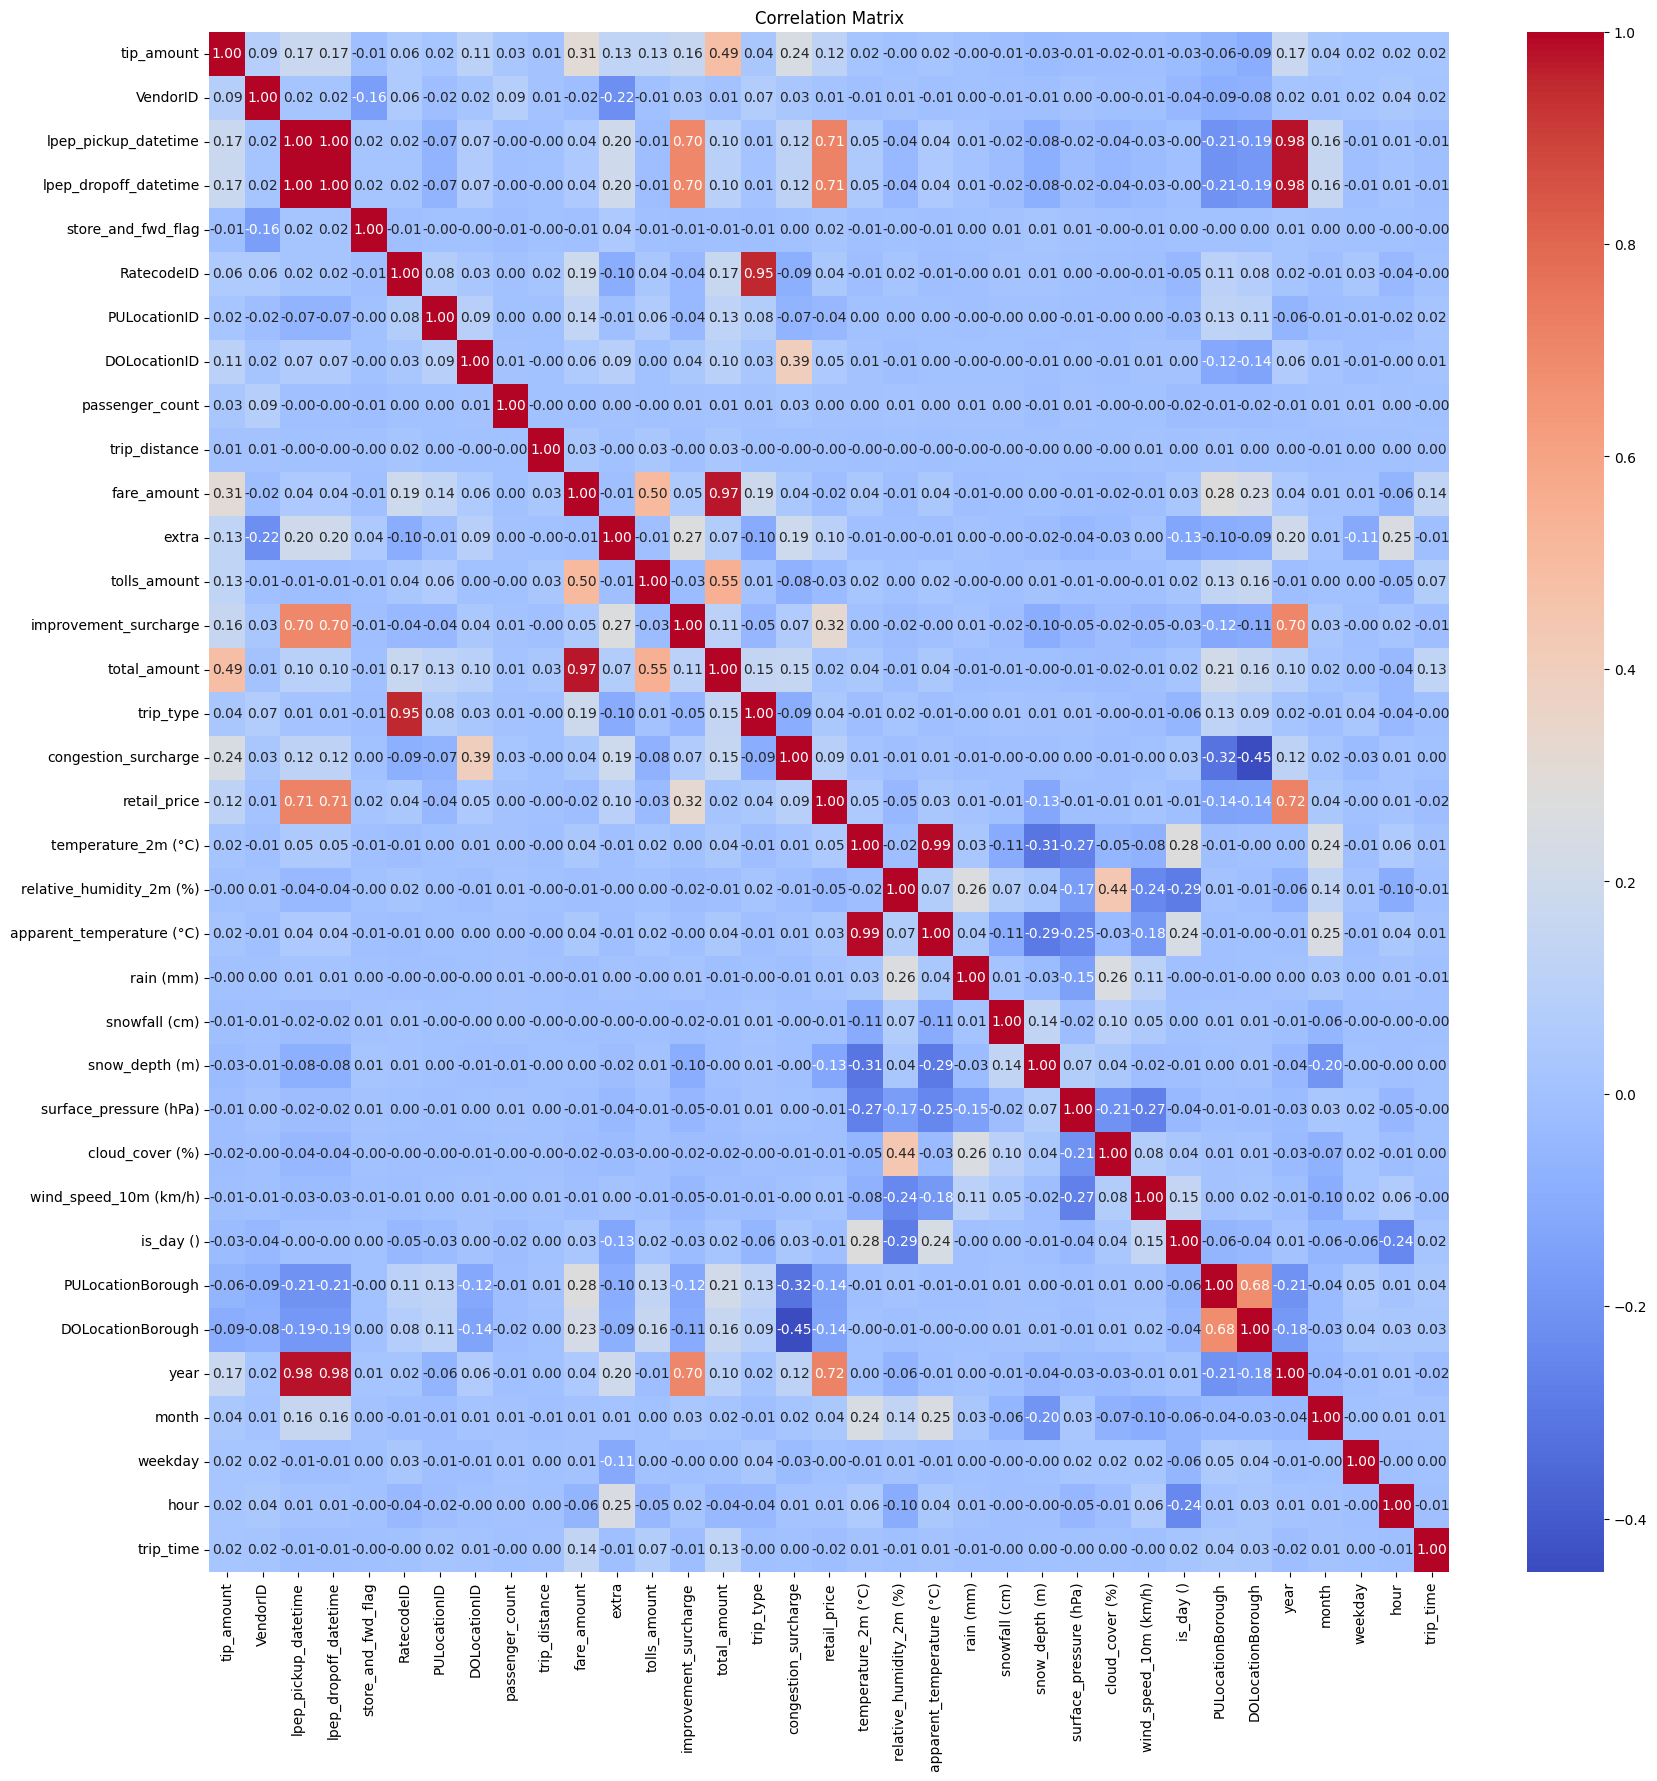

In [82]:
correlation_matrix = green_sample_df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

In [83]:
N = 1000
rs = 42

def get_samples_month_by_month_yellow(vechicle_type, oil_df, weather_df):
    dfs_to_concat = []
    for year in months_in_years.keys():
        filepaths = prepare_file_paths(year, vechicle_type)
        months = months_in_years[year]
        for i in tqdm(range(len(filepaths)), total=len(filepaths), desc=str(year)):
            month_df = pd.read_parquet(filepaths[i])
            choosen_df = month_df[month_df['payment_type'] == 1].sample(N, random_state=rs).copy()
            
            choosen_df['nearest_date'] = choosen_df['tpep_pickup_datetime'].parallel_apply(lambda x: oil_df.iloc[(oil_df['date']-x).abs().argsort()[:1]]['date'].values[0])
            merged_oil_df = pd.merge(choosen_df, oil_df, how='left', left_on='nearest_date', right_on='date')
            merged_oil_df = merged_oil_df.drop(columns = ['nearest_date', 'date'])
            
            merged_oil_df['nearest_date'] = merged_oil_df['tpep_pickup_datetime'].parallel_apply(lambda x: weather_df.iloc[(weather_df['time']-x).abs().argsort()[:1]]['time'].values[0])
            merged_oil_weather_df = pd.merge(merged_oil_df, weather_df, how='left', left_on='nearest_date', right_on='time')
            merged_oil_weather_df = merged_oil_weather_df.drop(columns = ['nearest_date', 'time'])
       
            dfs_to_concat.append(merged_oil_weather_df)
    
    samples_df = pd.concat(dfs_to_concat, ignore_index=True)
            
    return samples_df

In [84]:
choosen_df = get_samples_month_by_month_yellow('yellow', oil_df, weather_df)
choosen_df

2023: 100%|██████████| 12/12 [01:38<00:00,  8.22s/it]
/tmp/ipykernel_38919/4138520850.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  samples_df = pd.concat(dfs_to_concat, ignore_index=True)


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0             1  2019-11-27 16:55:47   2019-11-27 17:12:14              1.0   
1             1  2019-11-11 11:09:33   2019-11-11 11:24:39              0.0   
2             2  2019-11-24 13:31:49   2019-11-24 13:36:43              1.0   
3             1  2019-11-15 23:48:04   2019-11-15 23:59:01              2.0   
4             2  2019-11-09 07:05:56   2019-11-09 07:44:49              1.0   
...         ...                  ...                   ...              ...   
58995         1  2023-07-15 18:56:53   2023-07-15 18:59:33              2.0   
58996         2  2023-07-07 12:02:57   2023-07-07 12:08:59              1.0   
58997         2  2023-07-27 08:34:14   2023-07-27 08:52:10              6.0   
58998         2  2023-07-21 14:21:28   2023-07-21 14:32:50              4.0   
58999         2  2023-07-20 23:35:31   2023-07-21 00:34:52              1.0   

       trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0               1.60         1.0                  N            43   
1               2.10         1.0                  N            43   
2               0.49         1.0                  N            48   
3               1.00         1.0                  N            79   
4              21.01         2.0                  N           132   
...              ...         ...                ...           ...   
58995           0.40         1.0                  N            90   
58996           0.94         1.0                  N           107   
58997           3.87         1.0                  N           249   
58998           0.72         1.0                  N           162   
58999          21.19         2.0                  N           132   

       DOLocationID  payment_type  ...  apparent_temperature (°C)  \
0               170             1  ...                        8.5   
1               262             1  ...                        8.4   
2               163             1  ...                        0.5   
3               249             1  ...                       -1.2   
4               238             1  ...                       -7.3   
...             ...           ...  ...                        ...   
58995            90             1  ...                       29.9   
58996           164             1  ...                       34.3   
58997           141             1  ...                       30.2   
58998           237             1  ...                       31.5   
58999            13             1  ...                       25.2   

       precipitation (mm)  rain (mm)  snowfall (cm)  snow_depth (m)  \
0                     0.0        0.0            0.0             0.0   
1                     0.0        0.0            0.0             0.0   
2                     0.5        0.5            0.0             0.0   
3                     0.0        0.0            0.0             0.0   
4                     0.0        0.0            0.0             0.0   
...                   ...        ...            ...             ...   
58995                 0.0        0.0            0.0             0.0   
58996                 0.0        0.0            0.0             0.0   
58997                 0.0        0.0            0.0             0.0   
58998                 0.1        0.1            0.0             0.0   
58999                 0.0        0.0            0.0             0.0   

       surface_pressure (hPa)  cloud_cover (%)  wind_speed_10m (km/h)  \
0                       997.7               35                   21.4   
1                      1012.8               28                    3.4   
2                       984.7              100                   26.9   
3                      1017.4                2                   20.3   
4                      1021.3               12                    4.6   
...                       ...              ...                    ...   
58995                  1006.1       

In [85]:
choosen_df["store_and_fwd_flag"] = choosen_df["store_and_fwd_flag"].map({'N':0, 'Y':1})

In [86]:
import geopandas as gpd

shapefile = gpd.read_file("../taxi_zones")

location_to_borough_mapping = dict(zip(shapefile['LocationID'], shapefile['borough']))
location_to_borough_idx_mapping = dict(zip(shapefile['LocationID'], shapefile['borough'].map({'Manhattan': 0, 'Queens': 1, 'Brooklyn': 2, 'Bronx': 3, 'EWR': 4, 'Staten Island': 5})))

choosen_df["PULocationBorough"] = choosen_df.PULocationID.map(location_to_borough_idx_mapping)
choosen_df["DOLocationBorough"] = choosen_df.DOLocationID.map(location_to_borough_idx_mapping)

In [87]:
choosen_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'retail_price',
       'temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)',
       'apparent_temperature (°C)', 'precipitation (mm)', 'rain (mm)',
       'snowfall (cm)', 'snow_depth (m)', 'surface_pressure (hPa)',
       'cloud_cover (%)', 'wind_speed_10m (km/h)', 'is_day ()', 'Airport_fee',
       'PULocationBorough', 'DOLocationBorough'],
      dtype='object')

In [88]:
choosen_df['year'] = choosen_df['tpep_pickup_datetime'].dt.year
choosen_df['month'] = choosen_df['tpep_pickup_datetime'].dt.month
choosen_df['weekday'] = choosen_df['tpep_pickup_datetime'].dt.weekday
choosen_df['hour'] = choosen_df['tpep_pickup_datetime'].dt.hour

choosen_df['trip_time'] = choosen_df['tpep_dropoff_datetime'] - choosen_df['tpep_pickup_datetime'] 

def timedelta_to_seconds(td):
    return td.total_seconds()

choosen_df['trip_time'] = choosen_df['trip_time'].apply(timedelta_to_seconds)
choosen_df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0             1  2019-11-27 16:55:47   2019-11-27 17:12:14              1.0   
1             1  2019-11-11 11:09:33   2019-11-11 11:24:39              0.0   
2             2  2019-11-24 13:31:49   2019-11-24 13:36:43              1.0   
3             1  2019-11-15 23:48:04   2019-11-15 23:59:01              2.0   
4             2  2019-11-09 07:05:56   2019-11-09 07:44:49              1.0   
...         ...                  ...                   ...              ...   
58995         1  2023-07-15 18:56:53   2023-07-15 18:59:33              2.0   
58996         2  2023-07-07 12:02:57   2023-07-07 12:08:59              1.0   
58997         2  2023-07-27 08:34:14   2023-07-27 08:52:10              6.0   
58998         2  2023-07-21 14:21:28   2023-07-21 14:32:50              4.0   
58999         2  2023-07-20 23:35:31   2023-07-21 00:34:52              1.0   

       trip_distance  RatecodeID  store_and_fwd_flag  PULocationID  \
0               1.60         1.0                   0            43   
1               2.10         1.0                   0            43   
2               0.49         1.0                   0            48   
3               1.00         1.0                   0            79   
4              21.01         2.0                   0           132   
...              ...         ...                 ...           ...   
58995           0.40         1.0                   0            90   
58996           0.94         1.0                   0           107   
58997           3.87         1.0                   0           249   
58998           0.72         1.0                   0           162   
58999          21.19         2.0                   0           132   

       DOLocationID  payment_type  ...  wind_speed_10m (km/h)  is_day ()  \
0               170             1  ...                   21.4          1   
1               262             1  ...                    3.4          1   
2               163             1  ...                   26.9          1   
3               249             1  ...                   20.3          0   
4               238             1  ...                    4.6          0   
...             ...           ...  ...                    ...        ...   
58995            90             1  ...                   15.5          1   
58996           164             1  ...                    8.7          1   
58997           141             1  ...                   18.8          1   
58998           237             1  ...                   15.6          1   
58999            13             1  ...                    7.1          0   

       Airport_fee  PULocationBorough  DOLocationBorough  year  month  \
0              NaN                0.0                0.0  2019     11   
1              NaN                0.0                0.0  2019     11   
2              NaN                0.0                0.0  2019     11   
3              NaN                0.0                0.0  2019     11   
4              NaN                1.0                0.0  2019     11   
...            ...                ...                ...   ...    ...   
58995          0.0                0.0                0.0  2023      7   
58996          0.0                0.0                0.0  2023      7   
58997          0.0                0.0                0.0  2023      7   
58998          0.0                0.0                0.0  2023      7   
58999          0.0                1.0                0.0  2023      7   

       weekday  hour  trip_time  
0            2    16      987.0  
1            0    11      906.0  
2            6    13      294.0  
3            4    23      657.0  
4            5     7     2333.0  
...        ...   ...        ...  
58995        5    18      160.0  
58996        4    12      362.0  
58997        3     8     1076.0  
58998        4    14      682.0  
58999        3    23     3561.0  

[59000 rows x 40 c

In [89]:
choosen_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'retail_price',
       'temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)',
       'apparent_temperature (°C)', 'precipitation (mm)', 'rain (mm)',
       'snowfall (cm)', 'snow_depth (m)', 'surface_pressure (hPa)',
       'cloud_cover (%)', 'wind_speed_10m (km/h)', 'is_day ()', 'Airport_fee',
       'PULocationBorough', 'DOLocationBorough', 'year', 'month', 'weekday',
       'hour', 'trip_time'],
      dtype='object')

In [90]:
choosen_df_sel = choosen_df[['tip_amount', 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'fare_amount', 'extra',
       'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'retail_price',
       'temperature_2m (°C)', 'relative_humidity_2m (%)',
       'apparent_temperature (°C)', 'rain (mm)',
       'snowfall (cm)', 'snow_depth (m)', 'surface_pressure (hPa)',
       'cloud_cover (%)', 'wind_speed_10m (km/h)', 'is_day ()', 'Airport_fee',
       'PULocationBorough', 'DOLocationBorough', 'year', 'month', 'weekday',
       'hour', 'trip_time']]

In [91]:
choosen_df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59000 entries, 0 to 58999
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   tip_amount                 59000 non-null  float64       
 1   VendorID                   59000 non-null  int64         
 2   tpep_pickup_datetime       59000 non-null  datetime64[us]
 3   tpep_dropoff_datetime      59000 non-null  datetime64[us]
 4   passenger_count            59000 non-null  float64       
 5   trip_distance              59000 non-null  float64       
 6   RatecodeID                 59000 non-null  float64       
 7   store_and_fwd_flag         59000 non-null  int64         
 8   PULocationID               59000 non-null  int64         
 9   DOLocationID               59000 non-null  int64         
 10  fare_amount                59000 non-null  float64       
 11  extra                      59000 non-null  float64       
 12  toll

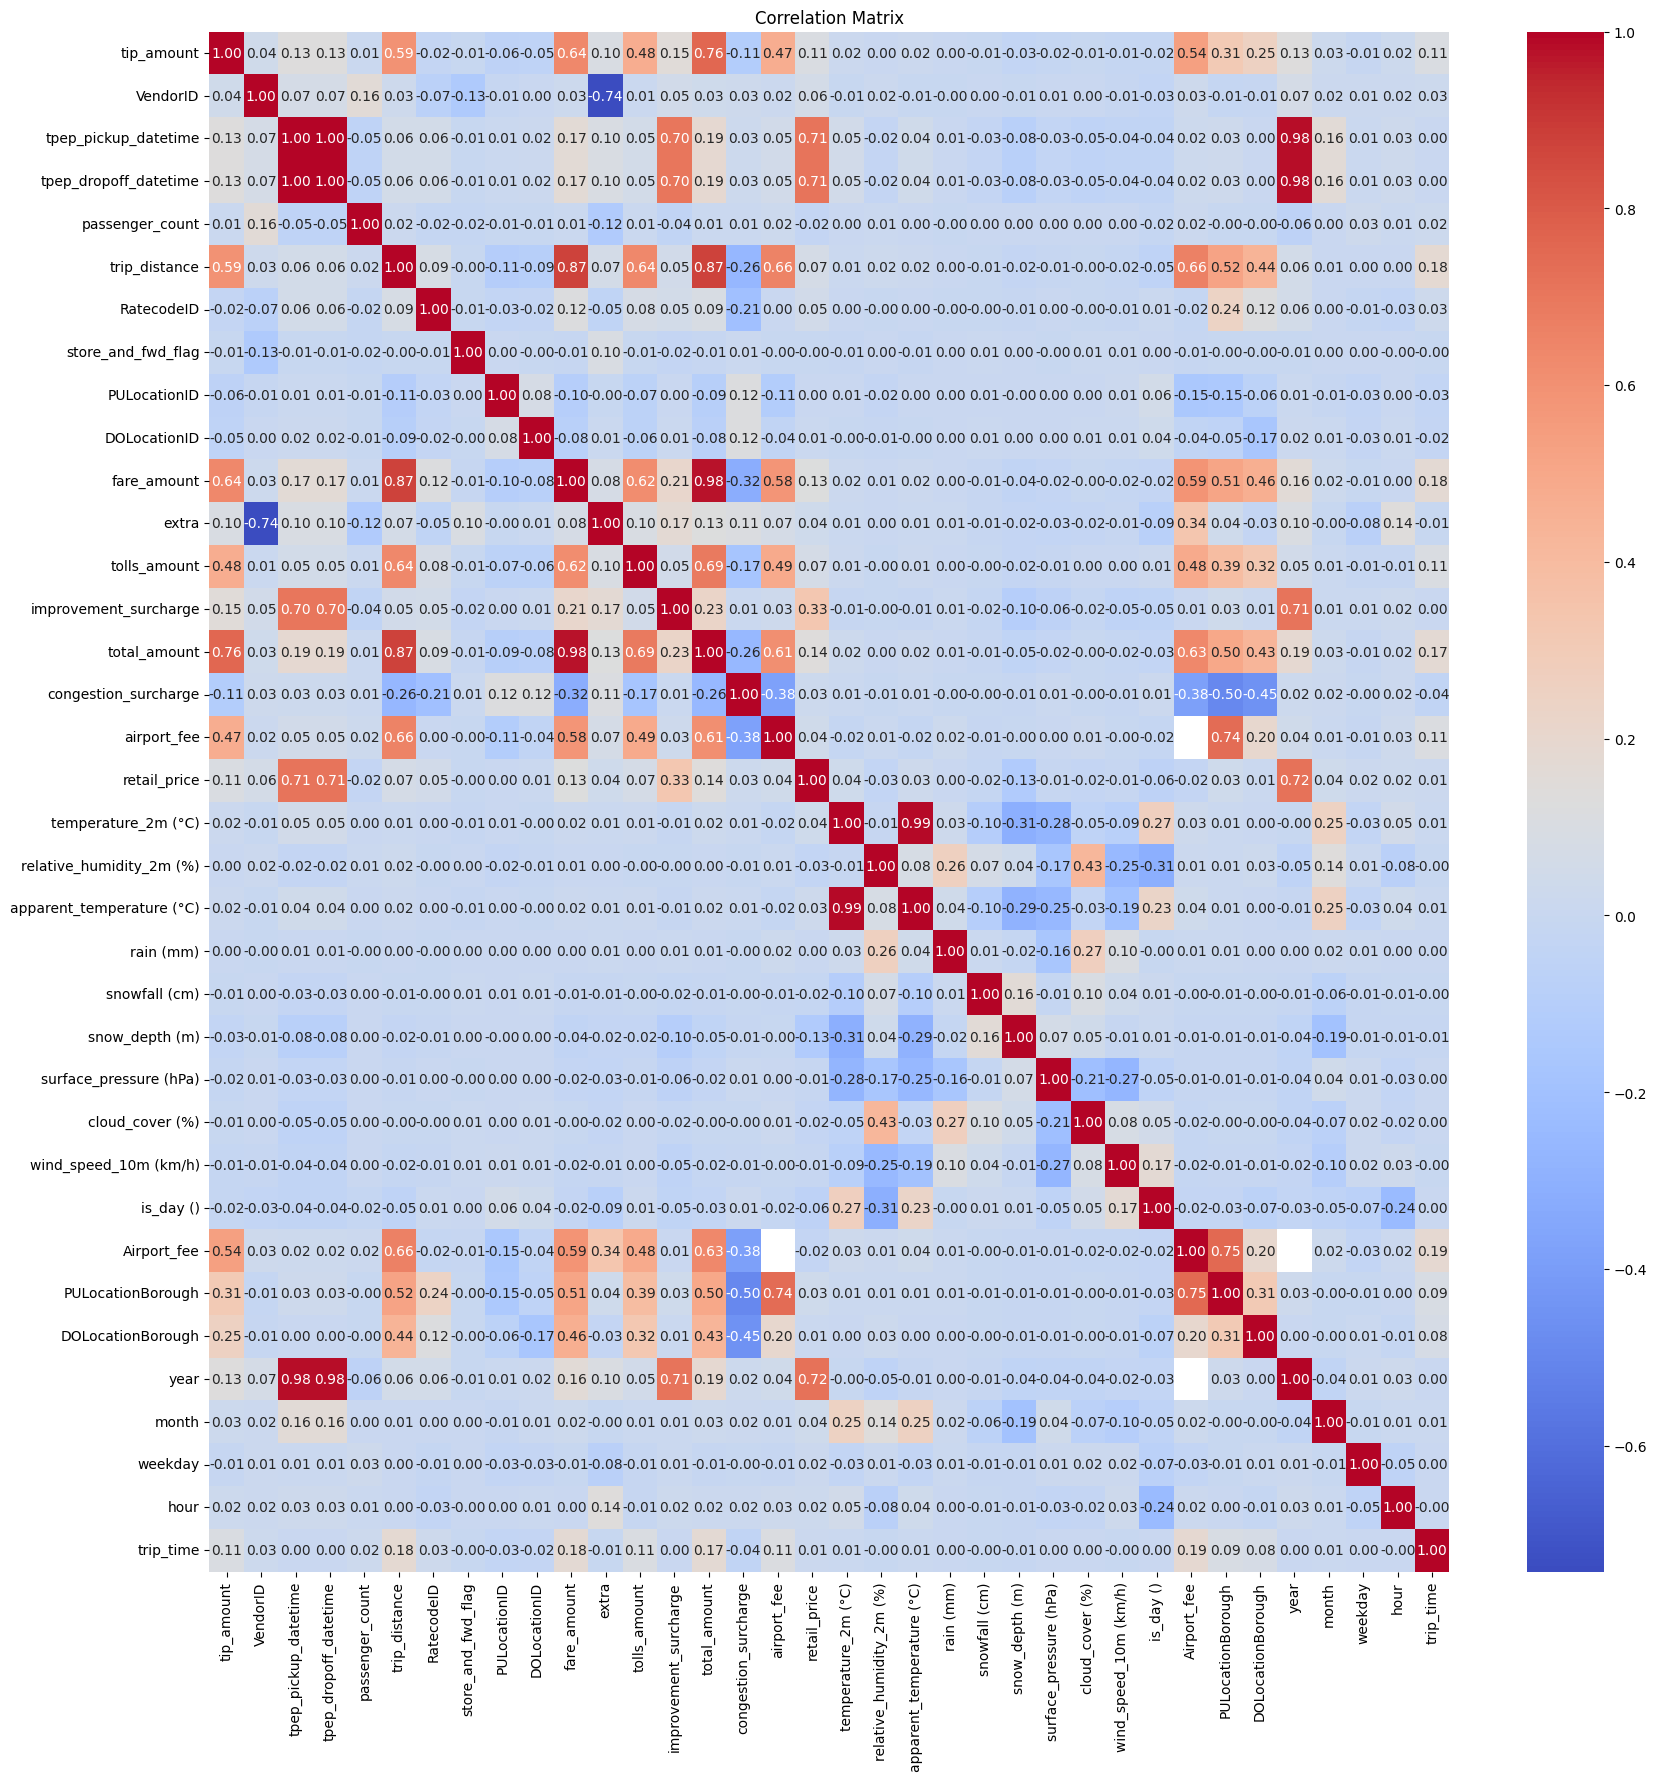

In [93]:
correlation_matrix = choosen_df_sel.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()